### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_df = application_df.drop(columns=["EIN","NAME"])
app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()

app_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = app_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

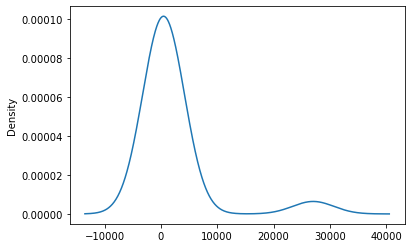

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 160].index)

# Replace in dataframe
for app in replace_application:
    app_df.APPLICATION_TYPE = app_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
app_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = app_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C5200        1
C2150        1
C1236        1
C2600        1
C1820        1
Name: CLASSIFICATION, Length: 71, dtype: int64

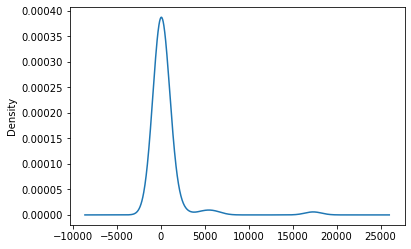

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1882].index)

# Replace in dataframe
for cls in replace_class:
    app_df.CLASSIFICATION = app_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
app_df = app_df.merge(encode_df,left_index=True, right_index=True)
app_df = app_df.drop(application_cat,1)
app_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = app_df.IS_SUCCESSFUL
X = app_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#number_input_features = len(X_train[0])
#hidden_nodes_layer1 = 80
#hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, kernel_initializer = "uniform", activation="relu", input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, kernel_initializer = "uniform", activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "AlphabetSoupCharity.h5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])


Epoch 1/100
  1/804 [..............................] - ETA: 0s - loss: 0.4739 - accuracy: 0.7812
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
 10/804 [..............................] - ETA: 4s - loss: 0.5501 - accuracy: 0.7250
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
 22/804 [..............................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7259
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
 34/804 [>.............................] - ETA: 3s - loss: 0.5552 - accuracy: 0.7206
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
 45/804 [>.............................] - ETA: 3s - loss: 0.5378 - accuracy: 0.7396
Epoch 00001: saving model to AlphabetSoupCharity.h5
 50/804 [>............................

365/804 [============>.................] - ETA: 3s - loss: 0.5382 - accuracy: 0.7373
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
375/804 [============>.................] - ETA: 3s - loss: 0.5390 - accuracy: 0.7361
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
385/804 [=============>................] - ETA: 3s - loss: 0.5383 - accuracy: 0.7365
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
397/804 [=============>................] - ETA: 3s - loss: 0.5387 - accuracy: 0.7363
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
407/804 [==============>...............] - ETA: 3s - loss: 0.5385 - accuracy: 0.7363
Epoch 00001: saving model to AlphabetSoupCharity.h5

Epoch 00001: saving model to AlphabetSoupCharity.h5
415/804 [==============>...............] - ETA: 3s

804/804 [==============================] - 6s 7ms/step - loss: 0.5403 - accuracy: 0.7363
Epoch 2/100

Epoch 00002: saving model to AlphabetSoupCharity.h5
  1/804 [..............................] - ETA: 0s - loss: 0.5966 - accuracy: 0.7812
Epoch 00002: saving model to AlphabetSoupCharity.h5

Epoch 00002: saving model to AlphabetSoupCharity.h5
 11/804 [..............................] - ETA: 4s - loss: 0.5190 - accuracy: 0.7670
Epoch 00002: saving model to AlphabetSoupCharity.h5

Epoch 00002: saving model to AlphabetSoupCharity.h5
 21/804 [..............................] - ETA: 4s - loss: 0.5219 - accuracy: 0.7560
Epoch 00002: saving model to AlphabetSoupCharity.h5

Epoch 00002: saving model to AlphabetSoupCharity.h5
 31/804 [>.............................] - ETA: 4s - loss: 0.5128 - accuracy: 0.7661
Epoch 00002: saving model to AlphabetSoupCharity.h5

Epoch 00002: saving model to AlphabetSoupCharity.h5
 41/804 [>.............................] - ETA: 4s - loss: 0.5225 - accuracy: 0.7569
E


Epoch 00002: saving model to AlphabetSoupCharity.h5
438/804 [===============>..............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7339
Epoch 00002: saving model to AlphabetSoupCharity.h5

Epoch 00002: saving model to AlphabetSoupCharity.h5
446/804 [===============>..............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7340
Epoch 00002: saving model to AlphabetSoupCharity.h5
455/804 [===============>..............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7337
Epoch 00002: saving model to AlphabetSoupCharity.h5

Epoch 00002: saving model to AlphabetSoupCharity.h5
461/804 [================>.............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7331
Epoch 00002: saving model to AlphabetSoupCharity.h5

Epoch 00002: saving model to AlphabetSoupCharity.h5
471/804 [================>.............] - ETA: 1s - loss: 0.5418 - accuracy: 0.7327
Epoch 00002: saving model to AlphabetSoupCharity.h5

Epoch 00002: saving model to AlphabetSoupCharity.h5
481/804 [================>.............] - ETA: 1s


Epoch 00003: saving model to AlphabetSoupCharity.h5
 57/804 [=>............................] - ETA: 4s - loss: 0.5329 - accuracy: 0.7500
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.h5
 67/804 [=>............................] - ETA: 4s - loss: 0.5377 - accuracy: 0.7439
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.h5
 77/804 [=>............................] - ETA: 4s - loss: 0.5441 - accuracy: 0.7386
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.h5
 87/804 [==>...........................] - ETA: 4s - loss: 0.5401 - accuracy: 0.7417
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.h5
 97/804 [==>...........................] - ETA: 4s - loss: 0.5423 - accuracy: 0.7381
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.


Epoch 00003: saving model to AlphabetSoupCharity.h5
492/804 [=================>............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7374
Epoch 00003: saving model to AlphabetSoupCharity.h5
501/804 [=================>............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7365
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.h5
507/804 [=================>............] - ETA: 1s - loss: 0.5391 - accuracy: 0.7364
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.h5
517/804 [==================>...........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7369
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.h5
527/804 [==================>...........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7367
Epoch 00003: saving model to AlphabetSoupCharity.h5

Epoch 00003: saving model to AlphabetSoupCharity.h5
537/804 [===================>..........] - ETA: 1s


Epoch 00004: saving model to AlphabetSoupCharity.h5
103/804 [==>...........................] - ETA: 4s - loss: 0.5318 - accuracy: 0.7421
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5
113/804 [===>..........................] - ETA: 4s - loss: 0.5295 - accuracy: 0.7428
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5
123/804 [===>..........................] - ETA: 4s - loss: 0.5332 - accuracy: 0.7396
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5
133/804 [===>..........................] - ETA: 4s - loss: 0.5317 - accuracy: 0.7406
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5
143/804 [====>.........................] - ETA: 4s - loss: 0.5322 - accuracy: 0.7428
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.


Epoch 00004: saving model to AlphabetSoupCharity.h5
538/804 [===================>..........] - ETA: 1s - loss: 0.5424 - accuracy: 0.7353
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5
548/804 [===================>..........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7353
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5
560/804 [===================>..........] - ETA: 1s - loss: 0.5420 - accuracy: 0.7358
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5
571/804 [====================>.........] - ETA: 1s - loss: 0.5418 - accuracy: 0.7362
Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5

Epoch 00004: saving model to AlphabetSoupCharity.h5
583/804 [====================>.........] - ETA: 1s - loss: 0.5410 - accuracy: 0.7368
Epoch 00004: saving model to AlphabetSoupCharity.

163/804 [=====>........................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7396
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
169/804 [=====>........................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7400
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
179/804 [=====>........................] - ETA: 3s - loss: 0.5343 - accuracy: 0.7406
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
189/804 [======>.......................] - ETA: 3s - loss: 0.5354 - accuracy: 0.7389
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
199/804 [======>.......................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7396
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
212/804 [======>.......................] - ETA: 3s

584/804 [====================>.........] - ETA: 1s - loss: 0.5384 - accuracy: 0.7362
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
594/804 [=====================>........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7361
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
604/804 [=====================>........] - ETA: 1s - loss: 0.5391 - accuracy: 0.7353
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
614/804 [=====================>........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7352
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
624/804 [======================>.......] - ETA: 1s - loss: 0.5393 - accuracy: 0.7352
Epoch 00005: saving model to AlphabetSoupCharity.h5

Epoch 00005: saving model to AlphabetSoupCharity.h5
634/804 [======================>.......] - ETA: 0s

205/804 [======>.......................] - ETA: 3s - loss: 0.5435 - accuracy: 0.7329
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
215/804 [=======>......................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7317
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
225/804 [=======>......................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7311
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
235/804 [=======>......................] - ETA: 3s - loss: 0.5461 - accuracy: 0.7312
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
245/804 [========>.....................] - ETA: 3s - loss: 0.5447 - accuracy: 0.7320
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
255/804 [========>.....................] - ETA: 2s


Epoch 00006: saving model to AlphabetSoupCharity.h5
646/804 [=======================>......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7359
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
655/804 [=======================>......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7361
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
665/804 [=======================>......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7368
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
678/804 [========================>.....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7364
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.h5
685/804 [========================>.....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7360
Epoch 00006: saving model to AlphabetSoupCharity.h5

Epoch 00006: saving model to AlphabetSoupCharity.

266/804 [========>.....................] - ETA: 3s - loss: 0.5384 - accuracy: 0.7398
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
276/804 [=========>....................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7404
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
286/804 [=========>....................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7405
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
296/804 [==========>...................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7402
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
306/804 [==========>...................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7395
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
316/804 [==========>...................] - ETA: 2s

691/804 [========================>.....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7359
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
701/804 [=========================>....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7359
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
711/804 [=========================>....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7360
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
721/804 [=========================>....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7361
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
731/804 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7358
Epoch 00007: saving model to AlphabetSoupCharity.h5

Epoch 00007: saving model to AlphabetSoupCharity.h5
741/804 [==========================>...] - ETA: 0s


Epoch 00008: saving model to AlphabetSoupCharity.h5
308/804 [==========>...................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7395
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
321/804 [==========>...................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7398
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
327/804 [===========>..................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7395
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
341/804 [===========>..................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7408
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
352/804 [============>.................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7400
Epoch 00008: saving model to AlphabetSoupCharity.

755/804 [===========================>..] - ETA: 0s - loss: 0.5394 - accuracy: 0.7362
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
762/804 [===========================>..] - ETA: 0s - loss: 0.5396 - accuracy: 0.7357
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
774/804 [===========================>..] - ETA: 0s - loss: 0.5393 - accuracy: 0.7358
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
783/804 [============================>.] - ETA: 0s - loss: 0.5392 - accuracy: 0.7360
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
796/804 [============================>.] - ETA: 0s - loss: 0.5395 - accuracy: 0.7364
Epoch 00008: saving model to AlphabetSoupCharity.h5

Epoch 00008: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 4s 5ms/


Epoch 00009: saving model to AlphabetSoupCharity.h5
378/804 [=============>................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7326
Epoch 00009: saving model to AlphabetSoupCharity.h5

Epoch 00009: saving model to AlphabetSoupCharity.h5
388/804 [=============>................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7324
Epoch 00009: saving model to AlphabetSoupCharity.h5

Epoch 00009: saving model to AlphabetSoupCharity.h5
398/804 [=============>................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7323
Epoch 00009: saving model to AlphabetSoupCharity.h5

Epoch 00009: saving model to AlphabetSoupCharity.h5
409/804 [==============>...............] - ETA: 2s - loss: 0.5405 - accuracy: 0.7336
Epoch 00009: saving model to AlphabetSoupCharity.h5

Epoch 00009: saving model to AlphabetSoupCharity.h5
418/804 [==============>...............] - ETA: 2s - loss: 0.5392 - accuracy: 0.7347
Epoch 00009: saving model to AlphabetSoupCharity.h5

Epoch 00009: saving model to AlphabetSoupCharity.

Epoch 10/100
  1/804 [..............................] - ETA: 0s - loss: 0.4654 - accuracy: 0.8438
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
  9/804 [..............................] - ETA: 4s - loss: 0.5143 - accuracy: 0.7431
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
 19/804 [..............................] - ETA: 4s - loss: 0.5310 - accuracy: 0.7401
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
 29/804 [>.............................] - ETA: 4s - loss: 0.5315 - accuracy: 0.7360
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
 39/804 [>.............................] - ETA: 4s - loss: 0.5433 - accuracy: 0.7276
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to Alphabe

438/804 [===============>..............] - ETA: 2s - loss: 0.5399 - accuracy: 0.7336
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
446/804 [===============>..............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7335
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
454/804 [===============>..............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7329
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
464/804 [================>.............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7326
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
478/804 [================>.............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7335
Epoch 00010: saving model to AlphabetSoupCharity.h5

Epoch 00010: saving model to AlphabetSoupCharity.h5
484/804 [=================>............] - ETA: 1s

 55/804 [=>............................] - ETA: 4s - loss: 0.5431 - accuracy: 0.7335
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
 65/804 [=>............................] - ETA: 4s - loss: 0.5445 - accuracy: 0.7346
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
 75/804 [=>............................] - ETA: 4s - loss: 0.5444 - accuracy: 0.7342
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
 85/804 [==>...........................] - ETA: 4s - loss: 0.5429 - accuracy: 0.7360
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
 95/804 [==>...........................] - ETA: 4s - loss: 0.5379 - accuracy: 0.7401
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
105/804 [==>...........................] - ETA: 4s

485/804 [=================>............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7357
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
495/804 [=================>............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7355
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
505/804 [=================>............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7362
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
515/804 [==================>...........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7360
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
525/804 [==================>...........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7361
Epoch 00011: saving model to AlphabetSoupCharity.h5

Epoch 00011: saving model to AlphabetSoupCharity.h5
538/804 [===================>..........] - ETA: 1s

111/804 [===>..........................] - ETA: 3s - loss: 0.5435 - accuracy: 0.7390
Epoch 00012: saving model to AlphabetSoupCharity.h5
120/804 [===>..........................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7406
Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: saving model to AlphabetSoupCharity.h5
126/804 [===>..........................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7396
Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: saving model to AlphabetSoupCharity.h5
136/804 [====>.........................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7392
Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: saving model to AlphabetSoupCharity.h5
147/804 [====>.........................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7392
Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: saving model to AlphabetSoupCharity.h5
161/804 [=====>........................] - ETA: 3s

546/804 [===================>..........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7382
Epoch 00012: saving model to AlphabetSoupCharity.h5
554/804 [===================>..........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7383
Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: saving model to AlphabetSoupCharity.h5
561/804 [===================>..........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7379
Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: saving model to AlphabetSoupCharity.h5
571/804 [====================>.........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7379
Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: saving model to AlphabetSoupCharity.h5
581/804 [====================>.........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7383
Epoch 00012: saving model to AlphabetSoupCharity.h5
590/804 [=====================>........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7379
Epoch 00012: saving model to AlphabetSoupCharity.h5

Epoch 00012: savin

157/804 [====>.........................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7387
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
167/804 [=====>........................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7401
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
177/804 [=====>........................] - ETA: 3s - loss: 0.5418 - accuracy: 0.7389
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
187/804 [=====>........................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7376
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
197/804 [======>.......................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7354
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
207/804 [======>.......................] - ETA: 3s

583/804 [====================>.........] - ETA: 1s - loss: 0.5376 - accuracy: 0.7384
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
592/804 [=====================>........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7389
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
602/804 [=====================>........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7385
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
612/804 [=====================>........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7380
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
623/804 [======================>.......] - ETA: 1s - loss: 0.5371 - accuracy: 0.7382
Epoch 00013: saving model to AlphabetSoupCharity.h5

Epoch 00013: saving model to AlphabetSoupCharity.h5
632/804 [======================>.......] - ETA: 0s

203/804 [======>.......................] - ETA: 3s - loss: 0.5361 - accuracy: 0.7369
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
213/804 [======>.......................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7368
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
224/804 [=======>......................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7383
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
233/804 [=======>......................] - ETA: 3s - loss: 0.5324 - accuracy: 0.7401
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
243/804 [========>.....................] - ETA: 3s - loss: 0.5323 - accuracy: 0.7407
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
253/804 [========>.....................] - ETA: 3s

642/804 [======================>.......] - ETA: 0s - loss: 0.5365 - accuracy: 0.7389
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
648/804 [=======================>......] - ETA: 0s - loss: 0.5369 - accuracy: 0.7386
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
658/804 [=======================>......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7377
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
668/804 [=======================>......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7380
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
678/804 [========================>.....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7377
Epoch 00014: saving model to AlphabetSoupCharity.h5

Epoch 00014: saving model to AlphabetSoupCharity.h5
688/804 [========================>.....] - ETA: 0s

261/804 [========>.....................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7385
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
269/804 [=========>....................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7380
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
281/804 [=========>....................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7383
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
291/804 [=========>....................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7387
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
299/804 [==========>...................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7388
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
309/804 [==========>...................] - ETA: 2s

689/804 [========================>.....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7366
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
704/804 [=========================>....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7365
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
714/804 [=========================>....] - ETA: 0s - loss: 0.5381 - accuracy: 0.7369
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7371
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.h5
734/804 [==========================>...] - ETA: 0s - loss: 0.5377 - accuracy: 0.7373
Epoch 00015: saving model to AlphabetSoupCharity.h5

Epoch 00015: saving model to AlphabetSoupCharity.

310/804 [==========>...................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7296
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
320/804 [==========>...................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7300
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
333/804 [===========>..................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7307
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
342/804 [===========>..................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7322
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
350/804 [============>.................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7323
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
360/804 [============>.................] - ETA: 2s

745/804 [==========================>...] - ETA: 0s - loss: 0.5384 - accuracy: 0.7368
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
755/804 [===========================>..] - ETA: 0s - loss: 0.5386 - accuracy: 0.7369
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
765/804 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7369
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7371
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
785/804 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.7365
Epoch 00016: saving model to AlphabetSoupCharity.h5

Epoch 00016: saving model to AlphabetSoupCharity.h5
795/804 [============================>.] - ETA: 0s

356/804 [============>.................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7360
Epoch 00017: saving model to AlphabetSoupCharity.h5

Epoch 00017: saving model to AlphabetSoupCharity.h5
366/804 [============>.................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7375
Epoch 00017: saving model to AlphabetSoupCharity.h5

Epoch 00017: saving model to AlphabetSoupCharity.h5
376/804 [=============>................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7366
Epoch 00017: saving model to AlphabetSoupCharity.h5

Epoch 00017: saving model to AlphabetSoupCharity.h5
386/804 [=============>................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7364
Epoch 00017: saving model to AlphabetSoupCharity.h5

Epoch 00017: saving model to AlphabetSoupCharity.h5
396/804 [=============>................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7348
Epoch 00017: saving model to AlphabetSoupCharity.h5

Epoch 00017: saving model to AlphabetSoupCharity.h5
407/804 [==============>...............] - ETA: 2s

786/804 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7371
Epoch 00017: saving model to AlphabetSoupCharity.h5

Epoch 00017: saving model to AlphabetSoupCharity.h5
796/804 [============================>.] - ETA: 0s - loss: 0.5390 - accuracy: 0.7368
Epoch 00017: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5388 - accuracy: 0.7369
Epoch 18/100
  1/804 [..............................] - ETA: 0s - loss: 0.4981 - accuracy: 0.7500
Epoch 00018: saving model to AlphabetSoupCharity.h5

Epoch 00018: saving model to AlphabetSoupCharity.h5
 10/804 [..............................] - ETA: 3s - loss: 0.4950 - accuracy: 0.7688
Epoch 00018: saving model to AlphabetSoupCharity.h5

Epoch 00018: saving model to AlphabetSoupCharity.h5
 17/804 [..............................] - ETA: 4s - loss: 0.4821 - accuracy: 0.7739
Epoch 00018: saving model to AlphabetSoupCharity.h5

Epoch 00018: saving model to AlphabetSoupCharity.h5
 


Epoch 00018: saving model to AlphabetSoupCharity.h5
412/804 [==============>...............] - ETA: 2s - loss: 0.5353 - accuracy: 0.7389
Epoch 00018: saving model to AlphabetSoupCharity.h5

Epoch 00018: saving model to AlphabetSoupCharity.h5
422/804 [==============>...............] - ETA: 2s - loss: 0.5357 - accuracy: 0.7381
Epoch 00018: saving model to AlphabetSoupCharity.h5

Epoch 00018: saving model to AlphabetSoupCharity.h5
432/804 [===============>..............] - ETA: 2s - loss: 0.5346 - accuracy: 0.7396
Epoch 00018: saving model to AlphabetSoupCharity.h5

Epoch 00018: saving model to AlphabetSoupCharity.h5
442/804 [===============>..............] - ETA: 2s - loss: 0.5348 - accuracy: 0.7387
Epoch 00018: saving model to AlphabetSoupCharity.h5

Epoch 00018: saving model to AlphabetSoupCharity.h5
452/804 [===============>..............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7386
Epoch 00018: saving model to AlphabetSoupCharity.h5

Epoch 00018: saving model to AlphabetSoupCharity.

 28/804 [>.............................] - ETA: 5s - loss: 0.5185 - accuracy: 0.7489
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
 38/804 [>.............................] - ETA: 5s - loss: 0.5277 - accuracy: 0.7401
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
 50/804 [>.............................] - ETA: 4s - loss: 0.5241 - accuracy: 0.7437
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
 60/804 [=>............................] - ETA: 4s - loss: 0.5244 - accuracy: 0.7448
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
 68/804 [=>............................] - ETA: 4s - loss: 0.5286 - accuracy: 0.7445
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
 78/804 [=>............................] - ETA: 4s

448/804 [===============>..............] - ETA: 2s - loss: 0.5389 - accuracy: 0.7384
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
458/804 [================>.............] - ETA: 2s - loss: 0.5389 - accuracy: 0.7384
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
468/804 [================>.............] - ETA: 2s - loss: 0.5386 - accuracy: 0.7384
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
478/804 [================>.............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7373
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
488/804 [=================>............] - ETA: 1s - loss: 0.5399 - accuracy: 0.7370
Epoch 00019: saving model to AlphabetSoupCharity.h5

Epoch 00019: saving model to AlphabetSoupCharity.h5
498/804 [=================>............] - ETA: 1s

 73/804 [=>............................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7380
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
 84/804 [==>...........................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7370
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
 94/804 [==>...........................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7330
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
104/804 [==>...........................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7335
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
114/804 [===>..........................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7355
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.

504/804 [=================>............] - ETA: 1s - loss: 0.5366 - accuracy: 0.7356
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
514/804 [==================>...........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7363
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
524/804 [==================>...........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7354
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
534/804 [==================>...........] - ETA: 1s - loss: 0.5358 - accuracy: 0.7364
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
544/804 [===================>..........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7359
Epoch 00020: saving model to AlphabetSoupCharity.h5

Epoch 00020: saving model to AlphabetSoupCharity.h5
554/804 [===================>..........] - ETA: 1s


Epoch 00021: saving model to AlphabetSoupCharity.h5
130/804 [===>..........................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7440
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
140/804 [====>.........................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7437
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
152/804 [====>.........................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7438
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
160/804 [====>.........................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7410
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
170/804 [=====>........................] - ETA: 3s - loss: 0.5364 - accuracy: 0.7426
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.

550/804 [===================>..........] - ETA: 1s - loss: 0.5392 - accuracy: 0.7361
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
560/804 [===================>..........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7367
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
570/804 [====================>.........] - ETA: 1s - loss: 0.5395 - accuracy: 0.7361
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
580/804 [====================>.........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7362
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
590/804 [=====================>........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7361
Epoch 00021: saving model to AlphabetSoupCharity.h5

Epoch 00021: saving model to AlphabetSoupCharity.h5
600/804 [=====================>........] - ETA: 1s

171/804 [=====>........................] - ETA: 3s - loss: 0.5340 - accuracy: 0.7420
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
181/804 [=====>........................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7422
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
191/804 [======>.......................] - ETA: 3s - loss: 0.5340 - accuracy: 0.7421
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
201/804 [======>.......................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7421
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
214/804 [======>.......................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7398
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
223/804 [=======>......................] - ETA: 3s


Epoch 00022: saving model to AlphabetSoupCharity.h5
611/804 [=====================>........] - ETA: 1s - loss: 0.5395 - accuracy: 0.7363
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
621/804 [======================>.......] - ETA: 1s - loss: 0.5396 - accuracy: 0.7365
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
632/804 [======================>.......] - ETA: 0s - loss: 0.5388 - accuracy: 0.7370
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
643/804 [======================>.......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7365
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.h5
652/804 [=======================>......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7362
Epoch 00022: saving model to AlphabetSoupCharity.h5

Epoch 00022: saving model to AlphabetSoupCharity.

223/804 [=======>......................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7371
Epoch 00023: saving model to AlphabetSoupCharity.h5

Epoch 00023: saving model to AlphabetSoupCharity.h5
232/804 [=======>......................] - ETA: 3s - loss: 0.5375 - accuracy: 0.7399
Epoch 00023: saving model to AlphabetSoupCharity.h5

Epoch 00023: saving model to AlphabetSoupCharity.h5
242/804 [========>.....................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7380
Epoch 00023: saving model to AlphabetSoupCharity.h5

Epoch 00023: saving model to AlphabetSoupCharity.h5
252/804 [========>.....................] - ETA: 3s - loss: 0.5419 - accuracy: 0.7362
Epoch 00023: saving model to AlphabetSoupCharity.h5

Epoch 00023: saving model to AlphabetSoupCharity.h5
266/804 [========>.....................] - ETA: 3s - loss: 0.5417 - accuracy: 0.7357
Epoch 00023: saving model to AlphabetSoupCharity.h5

Epoch 00023: saving model to AlphabetSoupCharity.h5
274/804 [=========>....................] - ETA: 3s

657/804 [=======================>......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7399
Epoch 00023: saving model to AlphabetSoupCharity.h5

Epoch 00023: saving model to AlphabetSoupCharity.h5
667/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7393
Epoch 00023: saving model to AlphabetSoupCharity.h5
676/804 [========================>.....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7390
Epoch 00023: saving model to AlphabetSoupCharity.h5
681/804 [========================>.....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7395
Epoch 00023: saving model to AlphabetSoupCharity.h5

Epoch 00023: saving model to AlphabetSoupCharity.h5
687/804 [========================>.....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7394
Epoch 00023: saving model to AlphabetSoupCharity.h5
695/804 [========================>.....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7393
Epoch 00023: saving model to AlphabetSoupCharity.h5

Epoch 00023: saving model to AlphabetSoupCharity.h5
702/804 [==========


Epoch 00024: saving model to AlphabetSoupCharity.h5
269/804 [=========>....................] - ETA: 3s - loss: 0.5425 - accuracy: 0.7364
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.h5
278/804 [=========>....................] - ETA: 3s - loss: 0.5426 - accuracy: 0.7358
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.h5
288/804 [=========>....................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7365
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.h5
298/804 [==========>...................] - ETA: 3s - loss: 0.5420 - accuracy: 0.7358
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.h5
308/804 [==========>...................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7357
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.


Epoch 00024: saving model to AlphabetSoupCharity.h5
703/804 [=========================>....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7360
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.h5
713/804 [=========================>....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7364
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.h5
723/804 [=========================>....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7363
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.5394 - accuracy: 0.7362
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.h5
743/804 [==========================>...] - ETA: 0s - loss: 0.5395 - accuracy: 0.7362
Epoch 00024: saving model to AlphabetSoupCharity.h5

Epoch 00024: saving model to AlphabetSoupCharity.

324/804 [===========>..................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7331
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
334/804 [===========>..................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7335
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
344/804 [===========>..................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7336
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
354/804 [============>.................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7336
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
364/804 [============>.................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7330
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
378/804 [=============>................] - ETA: 2s


Epoch 00025: saving model to AlphabetSoupCharity.h5
764/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7377
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
774/804 [===========================>..] - ETA: 0s - loss: 0.5379 - accuracy: 0.7374
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
784/804 [============================>.] - ETA: 0s - loss: 0.5374 - accuracy: 0.7377
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
794/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7376
Epoch 00025: saving model to AlphabetSoupCharity.h5

Epoch 00025: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5384 - accuracy: 0.7371
Epoch 26/100
  1/804 [..............................] - ETA: 0s - loss: 0.5345 - accuracy: 0.7188


365/804 [============>.................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7380
Epoch 00026: saving model to AlphabetSoupCharity.h5

Epoch 00026: saving model to AlphabetSoupCharity.h5
375/804 [============>.................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7376
Epoch 00026: saving model to AlphabetSoupCharity.h5

Epoch 00026: saving model to AlphabetSoupCharity.h5
385/804 [=============>................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7373
Epoch 00026: saving model to AlphabetSoupCharity.h5

Epoch 00026: saving model to AlphabetSoupCharity.h5
395/804 [=============>................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7372
Epoch 00026: saving model to AlphabetSoupCharity.h5

Epoch 00026: saving model to AlphabetSoupCharity.h5
405/804 [==============>...............] - ETA: 2s - loss: 0.5392 - accuracy: 0.7362
Epoch 00026: saving model to AlphabetSoupCharity.h5

Epoch 00026: saving model to AlphabetSoupCharity.h5
415/804 [==============>...............] - ETA: 2s

796/804 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7376
Epoch 00026: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5384 - accuracy: 0.7377
Epoch 27/100

Epoch 00027: saving model to AlphabetSoupCharity.h5
  1/804 [..............................] - ETA: 0s - loss: 0.6851 - accuracy: 0.5938
Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.h5
 12/804 [..............................] - ETA: 3s - loss: 0.5620 - accuracy: 0.7422
Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.h5
 21/804 [..............................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7485
Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.h5
 31/804 [>.............................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7460
Epoch 00027: saving model to AlphabetSoupCharity.h5



406/804 [==============>...............] - ETA: 2s - loss: 0.5437 - accuracy: 0.7330
Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.h5
417/804 [==============>...............] - ETA: 2s - loss: 0.5427 - accuracy: 0.7343
Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.h5
426/804 [==============>...............] - ETA: 2s - loss: 0.5418 - accuracy: 0.7346
Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.h5
441/804 [===============>..............] - ETA: 2s - loss: 0.5407 - accuracy: 0.7352
Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.h5
451/804 [===============>..............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7350
Epoch 00027: saving model to AlphabetSoupCharity.h5

Epoch 00027: saving model to AlphabetSoupCharity.

 27/804 [>.............................] - ETA: 4s - loss: 0.5272 - accuracy: 0.7454
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
 37/804 [>.............................] - ETA: 4s - loss: 0.5235 - accuracy: 0.7458
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
 47/804 [>.............................] - ETA: 4s - loss: 0.5317 - accuracy: 0.7407
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
 58/804 [=>............................] - ETA: 4s - loss: 0.5420 - accuracy: 0.7355
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
 67/804 [=>............................] - ETA: 4s - loss: 0.5459 - accuracy: 0.7360
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
 77/804 [=>............................] - ETA: 4s

457/804 [================>.............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7335
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
467/804 [================>.............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7333
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
477/804 [================>.............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7334
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
490/804 [=================>............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7342
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.h5
502/804 [=================>............] - ETA: 1s - loss: 0.5413 - accuracy: 0.7347
Epoch 00028: saving model to AlphabetSoupCharity.h5

Epoch 00028: saving model to AlphabetSoupCharity.

 73/804 [=>............................] - ETA: 4s - loss: 0.5428 - accuracy: 0.7324
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
 83/804 [==>...........................] - ETA: 4s - loss: 0.5407 - accuracy: 0.7338
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
 93/804 [==>...........................] - ETA: 4s - loss: 0.5394 - accuracy: 0.7322
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
103/804 [==>...........................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7354
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
114/804 [===>..........................] - ETA: 4s - loss: 0.5403 - accuracy: 0.7330
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
124/804 [===>..........................] - ETA: 4s

505/804 [=================>............] - ETA: 1s - loss: 0.5371 - accuracy: 0.7380
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
513/804 [==================>...........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7376
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
523/804 [==================>...........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7382
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
533/804 [==================>...........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7384
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
543/804 [===================>..........] - ETA: 1s - loss: 0.5355 - accuracy: 0.7391
Epoch 00029: saving model to AlphabetSoupCharity.h5

Epoch 00029: saving model to AlphabetSoupCharity.h5
553/804 [===================>..........] - ETA: 1s

124/804 [===>..........................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7339
Epoch 00030: saving model to AlphabetSoupCharity.h5

Epoch 00030: saving model to AlphabetSoupCharity.h5
134/804 [====>.........................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7327
Epoch 00030: saving model to AlphabetSoupCharity.h5

Epoch 00030: saving model to AlphabetSoupCharity.h5
144/804 [====>.........................] - ETA: 3s - loss: 0.5424 - accuracy: 0.7335
Epoch 00030: saving model to AlphabetSoupCharity.h5
153/804 [====>.........................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7308
Epoch 00030: saving model to AlphabetSoupCharity.h5

Epoch 00030: saving model to AlphabetSoupCharity.h5
160/804 [====>.........................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7307
Epoch 00030: saving model to AlphabetSoupCharity.h5

Epoch 00030: saving model to AlphabetSoupCharity.h5
169/804 [=====>........................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7297
Epoch 00030: savin

539/804 [===================>..........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7372
Epoch 00030: saving model to AlphabetSoupCharity.h5
544/804 [===================>..........] - ETA: 1s - loss: 0.5384 - accuracy: 0.7373
Epoch 00030: saving model to AlphabetSoupCharity.h5
549/804 [===================>..........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7375
Epoch 00030: saving model to AlphabetSoupCharity.h5

Epoch 00030: saving model to AlphabetSoupCharity.h5
559/804 [===================>..........] - ETA: 1s - loss: 0.5377 - accuracy: 0.7376
Epoch 00030: saving model to AlphabetSoupCharity.h5

Epoch 00030: saving model to AlphabetSoupCharity.h5
569/804 [====================>.........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7381
Epoch 00030: saving model to AlphabetSoupCharity.h5

Epoch 00030: saving model to AlphabetSoupCharity.h5
579/804 [====================>.........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7380
Epoch 00030: saving model to AlphabetSoupCharity.h5

Epoch 00030: savin

161/804 [=====>........................] - ETA: 3s - loss: 0.5365 - accuracy: 0.7358
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
170/804 [=====>........................] - ETA: 3s - loss: 0.5339 - accuracy: 0.7377
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
180/804 [=====>........................] - ETA: 3s - loss: 0.5317 - accuracy: 0.7403
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
192/804 [======>.......................] - ETA: 3s - loss: 0.5324 - accuracy: 0.7404
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
200/804 [======>.......................] - ETA: 3s - loss: 0.5307 - accuracy: 0.7414
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
210/804 [======>.......................] - ETA: 3s

595/804 [=====================>........] - ETA: 1s - loss: 0.5354 - accuracy: 0.7400
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
605/804 [=====================>........] - ETA: 1s - loss: 0.5356 - accuracy: 0.7397
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
615/804 [=====================>........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7392
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
625/804 [======================>.......] - ETA: 0s - loss: 0.5361 - accuracy: 0.7391
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
635/804 [======================>.......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7387
Epoch 00031: saving model to AlphabetSoupCharity.h5

Epoch 00031: saving model to AlphabetSoupCharity.h5
648/804 [=======================>......] - ETA: 0s

216/804 [=======>......................] - ETA: 3s - loss: 0.5387 - accuracy: 0.7329
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
228/804 [=======>......................] - ETA: 3s - loss: 0.5390 - accuracy: 0.7325
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
236/804 [=======>......................] - ETA: 3s - loss: 0.5401 - accuracy: 0.7323
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
246/804 [========>.....................] - ETA: 3s - loss: 0.5401 - accuracy: 0.7320
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
256/804 [========>.....................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7321
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
266/804 [========>.....................] - ETA: 3s

641/804 [======================>.......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7373
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
651/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7378
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
661/804 [=======================>......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7383
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
671/804 [========================>.....] - ETA: 0s - loss: 0.5370 - accuracy: 0.7377
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
681/804 [========================>.....] - ETA: 0s - loss: 0.5370 - accuracy: 0.7377
Epoch 00032: saving model to AlphabetSoupCharity.h5

Epoch 00032: saving model to AlphabetSoupCharity.h5
691/804 [========================>.....] - ETA: 0s

252/804 [========>.....................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7340
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
262/804 [========>.....................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7327
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
272/804 [=========>....................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7336
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
282/804 [=========>....................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7336
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
292/804 [=========>....................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7356
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
302/804 [==========>...................] - ETA: 2s

672/804 [========================>.....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7358
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
682/804 [========================>.....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7359
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
694/804 [========================>.....] - ETA: 0s - loss: 0.5408 - accuracy: 0.7354
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
704/804 [=========================>....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7356
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
712/804 [=========================>....] - ETA: 0s - loss: 0.5400 - accuracy: 0.7361
Epoch 00033: saving model to AlphabetSoupCharity.h5

Epoch 00033: saving model to AlphabetSoupCharity.h5
723/804 [=========================>....] - ETA: 0s

Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
298/804 [==========>...................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7412
Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
308/804 [==========>...................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7413
Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
320/804 [==========>...................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7412
Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
330/804 [===========>..................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7411
Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
340/804 [===========>..................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7406
Epoch 00034: saving model to AlphabetSoupCharity.h

698/804 [=========================>....] - ETA: 0s - loss: 0.5370 - accuracy: 0.7369
Epoch 00034: saving model to AlphabetSoupCharity.h5
706/804 [=========================>....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7366
Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
713/804 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7362
Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
723/804 [=========================>....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7363
Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.5376 - accuracy: 0.7362
Epoch 00034: saving model to AlphabetSoupCharity.h5

Epoch 00034: saving model to AlphabetSoupCharity.h5
743/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7362
Epoch 00034: savin

309/804 [==========>...................] - ETA: 2s - loss: 0.5405 - accuracy: 0.7342
Epoch 00035: saving model to AlphabetSoupCharity.h5
317/804 [==========>...................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7351
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
325/804 [===========>..................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7359
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
334/804 [===========>..................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7358
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
344/804 [===========>..................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7355
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
354/804 [============>.................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7355
Epoch 00035: savin

734/804 [==========================>...] - ETA: 0s - loss: 0.5375 - accuracy: 0.7372
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
744/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7374
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
754/804 [===========================>..] - ETA: 0s - loss: 0.5378 - accuracy: 0.7370
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
764/804 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7367
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
774/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7367
Epoch 00035: saving model to AlphabetSoupCharity.h5

Epoch 00035: saving model to AlphabetSoupCharity.h5
785/804 [============================>.] - ETA: 0s

358/804 [============>.................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7351
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.h5
365/804 [============>.................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7348
Epoch 00036: saving model to AlphabetSoupCharity.h5
370/804 [============>.................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7355
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.h5
380/804 [=============>................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7359
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.h5
390/804 [=============>................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7353
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.h5
400/804 [=============>................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7374
Epoch 00036: savin


Epoch 00036: saving model to AlphabetSoupCharity.h5
745/804 [==========================>...] - ETA: 0s - loss: 0.5383 - accuracy: 0.7365
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.h5
755/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7365
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.h5
765/804 [===========================>..] - ETA: 0s - loss: 0.5379 - accuracy: 0.7366
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.h5
775/804 [===========================>..] - ETA: 0s - loss: 0.5377 - accuracy: 0.7366
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.h5
785/804 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7362
Epoch 00036: saving model to AlphabetSoupCharity.h5

Epoch 00036: saving model to AlphabetSoupCharity.

346/804 [===========>..................] - ETA: 3s - loss: 0.5325 - accuracy: 0.7392
Epoch 00037: saving model to AlphabetSoupCharity.h5

Epoch 00037: saving model to AlphabetSoupCharity.h5
356/804 [============>.................] - ETA: 3s - loss: 0.5325 - accuracy: 0.7398
Epoch 00037: saving model to AlphabetSoupCharity.h5

Epoch 00037: saving model to AlphabetSoupCharity.h5
366/804 [============>.................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7396
Epoch 00037: saving model to AlphabetSoupCharity.h5
371/804 [============>.................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7385
Epoch 00037: saving model to AlphabetSoupCharity.h5
380/804 [=============>................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7391
Epoch 00037: saving model to AlphabetSoupCharity.h5

Epoch 00037: saving model to AlphabetSoupCharity.h5
386/804 [=============>................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7392
Epoch 00037: saving model to AlphabetSoupCharity.h5
394/804 [==========

756/804 [===========================>..] - ETA: 0s - loss: 0.5380 - accuracy: 0.7372
Epoch 00037: saving model to AlphabetSoupCharity.h5

Epoch 00037: saving model to AlphabetSoupCharity.h5
766/804 [===========================>..] - ETA: 0s - loss: 0.5376 - accuracy: 0.7375
Epoch 00037: saving model to AlphabetSoupCharity.h5
775/804 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7379
Epoch 00037: saving model to AlphabetSoupCharity.h5

Epoch 00037: saving model to AlphabetSoupCharity.h5
781/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7376
Epoch 00037: saving model to AlphabetSoupCharity.h5

Epoch 00037: saving model to AlphabetSoupCharity.h5
791/804 [============================>.] - ETA: 0s - loss: 0.5378 - accuracy: 0.7372
Epoch 00037: saving model to AlphabetSoupCharity.h5

Epoch 00037: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 7ms/step - loss: 0.5381 - accuracy: 0.7370
Epoch 38/100
 

347/804 [===========>..................] - ETA: 3s - loss: 0.5367 - accuracy: 0.7351
Epoch 00038: saving model to AlphabetSoupCharity.h5
356/804 [============>.................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7354
Epoch 00038: saving model to AlphabetSoupCharity.h5

Epoch 00038: saving model to AlphabetSoupCharity.h5
362/804 [============>.................] - ETA: 3s - loss: 0.5364 - accuracy: 0.7357
Epoch 00038: saving model to AlphabetSoupCharity.h5
370/804 [============>.................] - ETA: 3s - loss: 0.5366 - accuracy: 0.7357
Epoch 00038: saving model to AlphabetSoupCharity.h5

Epoch 00038: saving model to AlphabetSoupCharity.h5
381/804 [=============>................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7361
Epoch 00038: saving model to AlphabetSoupCharity.h5

Epoch 00038: saving model to AlphabetSoupCharity.h5
391/804 [=============>................] - ETA: 2s - loss: 0.5355 - accuracy: 0.7366
Epoch 00038: saving model to AlphabetSoupCharity.h5

Epoch 00038: savin

757/804 [===========================>..] - ETA: 0s - loss: 0.5387 - accuracy: 0.7363
Epoch 00038: saving model to AlphabetSoupCharity.h5
766/804 [===========================>..] - ETA: 0s - loss: 0.5388 - accuracy: 0.7362
Epoch 00038: saving model to AlphabetSoupCharity.h5

Epoch 00038: saving model to AlphabetSoupCharity.h5
772/804 [===========================>..] - ETA: 0s - loss: 0.5391 - accuracy: 0.7362
Epoch 00038: saving model to AlphabetSoupCharity.h5

Epoch 00038: saving model to AlphabetSoupCharity.h5
782/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7362
Epoch 00038: saving model to AlphabetSoupCharity.h5

Epoch 00038: saving model to AlphabetSoupCharity.h5
792/804 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7363
Epoch 00038: saving model to AlphabetSoupCharity.h5

Epoch 00038: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 6s 7ms/step - loss: 0.5383 - accuracy: 0.7368
Epoch 39/100
 

353/804 [============>.................] - ETA: 3s - loss: 0.5279 - accuracy: 0.7455
Epoch 00039: saving model to AlphabetSoupCharity.h5

Epoch 00039: saving model to AlphabetSoupCharity.h5
363/804 [============>.................] - ETA: 3s - loss: 0.5288 - accuracy: 0.7447
Epoch 00039: saving model to AlphabetSoupCharity.h5

Epoch 00039: saving model to AlphabetSoupCharity.h5
373/804 [============>.................] - ETA: 3s - loss: 0.5295 - accuracy: 0.7435
Epoch 00039: saving model to AlphabetSoupCharity.h5

Epoch 00039: saving model to AlphabetSoupCharity.h5
383/804 [=============>................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7422
Epoch 00039: saving model to AlphabetSoupCharity.h5
392/804 [=============>................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7410
Epoch 00039: saving model to AlphabetSoupCharity.h5
396/804 [=============>................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7409
Epoch 00039: saving model to AlphabetSoupCharity.h5
402/804 [==========

765/804 [===========================>..] - ETA: 0s - loss: 0.5374 - accuracy: 0.7373
Epoch 00039: saving model to AlphabetSoupCharity.h5

Epoch 00039: saving model to AlphabetSoupCharity.h5
773/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7375
Epoch 00039: saving model to AlphabetSoupCharity.h5

Epoch 00039: saving model to AlphabetSoupCharity.h5
783/804 [============================>.] - ETA: 0s - loss: 0.5378 - accuracy: 0.7370
Epoch 00039: saving model to AlphabetSoupCharity.h5

Epoch 00039: saving model to AlphabetSoupCharity.h5
793/804 [============================>.] - ETA: 0s - loss: 0.5373 - accuracy: 0.7377
Epoch 00039: saving model to AlphabetSoupCharity.h5

Epoch 00039: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 7ms/step - loss: 0.5377 - accuracy: 0.7375
Epoch 40/100
  1/804 [..............................] - ETA: 0s - loss: 0.6071 - accuracy: 0.6875
Epoch 00040: saving model to AlphabetSoupCharity.h5



359/804 [============>.................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7393
Epoch 00040: saving model to AlphabetSoupCharity.h5

Epoch 00040: saving model to AlphabetSoupCharity.h5
369/804 [============>.................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7392
Epoch 00040: saving model to AlphabetSoupCharity.h5

Epoch 00040: saving model to AlphabetSoupCharity.h5
379/804 [=============>................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7391
Epoch 00040: saving model to AlphabetSoupCharity.h5

Epoch 00040: saving model to AlphabetSoupCharity.h5
389/804 [=============>................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7379
Epoch 00040: saving model to AlphabetSoupCharity.h5

Epoch 00040: saving model to AlphabetSoupCharity.h5
399/804 [=============>................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7386
Epoch 00040: saving model to AlphabetSoupCharity.h5

Epoch 00040: saving model to AlphabetSoupCharity.h5
412/804 [==============>...............] - ETA: 2s

786/804 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.7371
Epoch 00040: saving model to AlphabetSoupCharity.h5

Epoch 00040: saving model to AlphabetSoupCharity.h5
795/804 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7375
Epoch 00040: saving model to AlphabetSoupCharity.h5

Epoch 00040: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5382 - accuracy: 0.7378
Epoch 41/100
  1/804 [..............................] - ETA: 0s - loss: 0.5362 - accuracy: 0.6875
Epoch 00041: saving model to AlphabetSoupCharity.h5

Epoch 00041: saving model to AlphabetSoupCharity.h5
 10/804 [..............................] - ETA: 4s - loss: 0.5663 - accuracy: 0.7125
Epoch 00041: saving model to AlphabetSoupCharity.h5

Epoch 00041: saving model to AlphabetSoupCharity.h5
 20/804 [..............................] - ETA: 4s - loss: 0.5770 - accuracy: 0.7078
Epoch 00041: saving model to AlphabetSoupCharity.h5



405/804 [==============>...............] - ETA: 2s - loss: 0.5355 - accuracy: 0.7386
Epoch 00041: saving model to AlphabetSoupCharity.h5

Epoch 00041: saving model to AlphabetSoupCharity.h5
415/804 [==============>...............] - ETA: 2s - loss: 0.5355 - accuracy: 0.7387
Epoch 00041: saving model to AlphabetSoupCharity.h5

Epoch 00041: saving model to AlphabetSoupCharity.h5
425/804 [==============>...............] - ETA: 2s - loss: 0.5354 - accuracy: 0.7381
Epoch 00041: saving model to AlphabetSoupCharity.h5

Epoch 00041: saving model to AlphabetSoupCharity.h5

Epoch 00041: saving model to AlphabetSoupCharity.h5
440/804 [===============>..............] - ETA: 2s - loss: 0.5367 - accuracy: 0.7366
Epoch 00041: saving model to AlphabetSoupCharity.h5

Epoch 00041: saving model to AlphabetSoupCharity.h5
450/804 [===============>..............] - ETA: 2s - loss: 0.5365 - accuracy: 0.7365
Epoch 00041: saving model to AlphabetSoupCharity.h5

Epoch 00041: saving model to AlphabetSoupCharity.

 11/804 [..............................] - ETA: 4s - loss: 0.5288 - accuracy: 0.7528
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
 21/804 [..............................] - ETA: 4s - loss: 0.5101 - accuracy: 0.7619
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
 31/804 [>.............................] - ETA: 4s - loss: 0.5214 - accuracy: 0.7550
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
 41/804 [>.............................] - ETA: 4s - loss: 0.5208 - accuracy: 0.7515
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
 51/804 [>.............................] - ETA: 4s - loss: 0.5148 - accuracy: 0.7574
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
 61/804 [=>............................] - ETA: 4s

445/804 [===============>..............] - ETA: 2s - loss: 0.5380 - accuracy: 0.7357
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
453/804 [===============>..............] - ETA: 2s - loss: 0.5377 - accuracy: 0.7357
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
466/804 [================>.............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7354
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
476/804 [================>.............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7355
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.h5
486/804 [=================>............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7347
Epoch 00042: saving model to AlphabetSoupCharity.h5

Epoch 00042: saving model to AlphabetSoupCharity.

 62/804 [=>............................] - ETA: 4s - loss: 0.5444 - accuracy: 0.7364
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
 72/804 [=>............................] - ETA: 4s - loss: 0.5425 - accuracy: 0.7326
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
 82/804 [==>...........................] - ETA: 4s - loss: 0.5434 - accuracy: 0.7321
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
 92/804 [==>...........................] - ETA: 4s - loss: 0.5460 - accuracy: 0.7276
Epoch 00043: saving model to AlphabetSoupCharity.h5
100/804 [==>...........................] - ETA: 4s - loss: 0.5495 - accuracy: 0.7259
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
107/804 [==>...........................] - ETA: 4s - loss: 0.5458 - accuracy: 0.7293
Epoch 00043: savin

487/804 [=================>............] - ETA: 1s - loss: 0.5389 - accuracy: 0.7344
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
497/804 [=================>............] - ETA: 1s - loss: 0.5391 - accuracy: 0.7343
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
507/804 [=================>............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7344
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
517/804 [==================>...........] - ETA: 1s - loss: 0.5394 - accuracy: 0.7336
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
527/804 [==================>...........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7337
Epoch 00043: saving model to AlphabetSoupCharity.h5

Epoch 00043: saving model to AlphabetSoupCharity.h5
537/804 [===================>..........] - ETA: 1s

108/804 [===>..........................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7283
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
118/804 [===>..........................] - ETA: 4s - loss: 0.5421 - accuracy: 0.7275
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
128/804 [===>..........................] - ETA: 4s - loss: 0.5413 - accuracy: 0.7302
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
138/804 [====>.........................] - ETA: 3s - loss: 0.5426 - accuracy: 0.7305
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
148/804 [====>.........................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7329
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
158/804 [====>.........................] - ETA: 3s

543/804 [===================>..........] - ETA: 1s - loss: 0.5340 - accuracy: 0.7402
Epoch 00044: saving model to AlphabetSoupCharity.h5
548/804 [===================>..........] - ETA: 1s - loss: 0.5338 - accuracy: 0.7402
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
559/804 [===================>..........] - ETA: 1s - loss: 0.5350 - accuracy: 0.7389
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
568/804 [====================>.........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7391
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
578/804 [====================>.........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7391
Epoch 00044: saving model to AlphabetSoupCharity.h5

Epoch 00044: saving model to AlphabetSoupCharity.h5
589/804 [====================>.........] - ETA: 1s - loss: 0.5352 - accuracy: 0.7395
Epoch 00044: savin


Epoch 00045: saving model to AlphabetSoupCharity.h5
169/804 [=====>........................] - ETA: 3s - loss: 0.5285 - accuracy: 0.7437
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.h5
179/804 [=====>........................] - ETA: 3s - loss: 0.5298 - accuracy: 0.7423
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.h5
189/804 [======>.......................] - ETA: 3s - loss: 0.5281 - accuracy: 0.7436
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.h5
199/804 [======>.......................] - ETA: 3s - loss: 0.5289 - accuracy: 0.7418
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.h5
209/804 [======>.......................] - ETA: 3s - loss: 0.5295 - accuracy: 0.7407
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.

574/804 [====================>.........] - ETA: 1s - loss: 0.5321 - accuracy: 0.7406
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.h5
584/804 [====================>.........] - ETA: 1s - loss: 0.5320 - accuracy: 0.7410
Epoch 00045: saving model to AlphabetSoupCharity.h5
590/804 [=====================>........] - ETA: 1s - loss: 0.5322 - accuracy: 0.7410
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.h5
599/804 [=====================>........] - ETA: 1s - loss: 0.5326 - accuracy: 0.7407
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.h5
609/804 [=====================>........] - ETA: 1s - loss: 0.5325 - accuracy: 0.7407
Epoch 00045: saving model to AlphabetSoupCharity.h5

Epoch 00045: saving model to AlphabetSoupCharity.h5
619/804 [======================>.......] - ETA: 1s - loss: 0.5323 - accuracy: 0.7410
Epoch 00045: savin

185/804 [=====>........................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7329
Epoch 00046: saving model to AlphabetSoupCharity.h5
194/804 [======>.......................] - ETA: 3s - loss: 0.5389 - accuracy: 0.7332
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
200/804 [======>.......................] - ETA: 3s - loss: 0.5378 - accuracy: 0.7331
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
210/804 [======>.......................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7341
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
222/804 [=======>......................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7349
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
231/804 [=======>......................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7343
Epoch 00046: savin

610/804 [=====================>........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7349
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
620/804 [======================>.......] - ETA: 1s - loss: 0.5390 - accuracy: 0.7351
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
630/804 [======================>.......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7353
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
640/804 [======================>.......] - ETA: 0s - loss: 0.5381 - accuracy: 0.7359
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
650/804 [=======================>......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7361
Epoch 00046: saving model to AlphabetSoupCharity.h5

Epoch 00046: saving model to AlphabetSoupCharity.h5
660/804 [=======================>......] - ETA: 0s

232/804 [=======>......................] - ETA: 3s - loss: 0.5449 - accuracy: 0.7283
Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.h5
241/804 [=======>......................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7281
Epoch 00047: saving model to AlphabetSoupCharity.h5
247/804 [========>.....................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7280
Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.h5
256/804 [========>.....................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7292
Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.h5
266/804 [========>.....................] - ETA: 3s - loss: 0.5460 - accuracy: 0.7291
Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.h5
276/804 [=========>....................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7295
Epoch 00047: savin


Epoch 00047: saving model to AlphabetSoupCharity.h5
661/804 [=======================>......] - ETA: 0s - loss: 0.5398 - accuracy: 0.7345
Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.h5
676/804 [========================>.....] - ETA: 0s - loss: 0.5394 - accuracy: 0.7349
Epoch 00047: saving model to AlphabetSoupCharity.h5
683/804 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7354
Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.h5
691/804 [========================>.....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7354
Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.h5
701/804 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7360
Epoch 00047: saving model to AlphabetSoupCharity.h5

Epoch 00047: saving model to AlphabetSoupCharity.

277/804 [=========>....................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7398
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
287/804 [=========>....................] - ETA: 3s - loss: 0.5326 - accuracy: 0.7405
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
298/804 [==========>...................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7379
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
307/804 [==========>...................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7381
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
317/804 [==========>...................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7402
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
330/804 [===========>..................] - ETA: 2s


Epoch 00048: saving model to AlphabetSoupCharity.h5
707/804 [=========================>....] - ETA: 0s - loss: 0.5363 - accuracy: 0.7373
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
717/804 [=========================>....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7373
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
727/804 [==========================>...] - ETA: 0s - loss: 0.5366 - accuracy: 0.7372
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
740/804 [==========================>...] - ETA: 0s - loss: 0.5366 - accuracy: 0.7373
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.h5
747/804 [==========================>...] - ETA: 0s - loss: 0.5364 - accuracy: 0.7375
Epoch 00048: saving model to AlphabetSoupCharity.h5

Epoch 00048: saving model to AlphabetSoupCharity.

323/804 [===========>..................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7329
Epoch 00049: saving model to AlphabetSoupCharity.h5

Epoch 00049: saving model to AlphabetSoupCharity.h5
333/804 [===========>..................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7334
Epoch 00049: saving model to AlphabetSoupCharity.h5

Epoch 00049: saving model to AlphabetSoupCharity.h5
343/804 [===========>..................] - ETA: 2s - loss: 0.5431 - accuracy: 0.7326
Epoch 00049: saving model to AlphabetSoupCharity.h5

Epoch 00049: saving model to AlphabetSoupCharity.h5
353/804 [============>.................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7331
Epoch 00049: saving model to AlphabetSoupCharity.h5

Epoch 00049: saving model to AlphabetSoupCharity.h5
363/804 [============>.................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7329
Epoch 00049: saving model to AlphabetSoupCharity.h5

Epoch 00049: saving model to AlphabetSoupCharity.h5
373/804 [============>.................] - ETA: 2s

734/804 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7375
Epoch 00049: saving model to AlphabetSoupCharity.h5
740/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7374
Epoch 00049: saving model to AlphabetSoupCharity.h5
745/804 [==========================>...] - ETA: 0s - loss: 0.5374 - accuracy: 0.7372
Epoch 00049: saving model to AlphabetSoupCharity.h5

Epoch 00049: saving model to AlphabetSoupCharity.h5
753/804 [===========================>..] - ETA: 0s - loss: 0.5376 - accuracy: 0.7371
Epoch 00049: saving model to AlphabetSoupCharity.h5

Epoch 00049: saving model to AlphabetSoupCharity.h5
763/804 [===========================>..] - ETA: 0s - loss: 0.5379 - accuracy: 0.7369
Epoch 00049: saving model to AlphabetSoupCharity.h5
770/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7372
Epoch 00049: saving model to AlphabetSoupCharity.h5
773/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accu

329/804 [===========>..................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7343
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
339/804 [===========>..................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7336
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
349/804 [============>.................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7336
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
359/804 [============>.................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7338
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
369/804 [============>.................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7345
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
379/804 [=============>................] - ETA: 2s

759/804 [===========================>..] - ETA: 0s - loss: 0.5373 - accuracy: 0.7365
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
769/804 [===========================>..] - ETA: 0s - loss: 0.5380 - accuracy: 0.7360
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
779/804 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7358
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
790/804 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7360
Epoch 00050: saving model to AlphabetSoupCharity.h5

Epoch 00050: saving model to AlphabetSoupCharity.h5
799/804 [============================>.] - ETA: 0s - loss: 0.5381 - accuracy: 0.7364
Epoch 00050: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5382 - accuracy: 0.7363
Epoch 51/100
 

370/804 [============>.................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7367
Epoch 00051: saving model to AlphabetSoupCharity.h5
379/804 [=============>................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7366
Epoch 00051: saving model to AlphabetSoupCharity.h5

Epoch 00051: saving model to AlphabetSoupCharity.h5
388/804 [=============>................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7366
Epoch 00051: saving model to AlphabetSoupCharity.h5

Epoch 00051: saving model to AlphabetSoupCharity.h5
395/804 [=============>................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7369
Epoch 00051: saving model to AlphabetSoupCharity.h5

Epoch 00051: saving model to AlphabetSoupCharity.h5
405/804 [==============>...............] - ETA: 2s - loss: 0.5370 - accuracy: 0.7383
Epoch 00051: saving model to AlphabetSoupCharity.h5

Epoch 00051: saving model to AlphabetSoupCharity.h5
415/804 [==============>...............] - ETA: 2s - loss: 0.5367 - accuracy: 0.7385
Epoch 00051: savin

789/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7369
Epoch 00051: saving model to AlphabetSoupCharity.h5
793/804 [============================>.] - ETA: 0s - loss: 0.5376 - accuracy: 0.7369
Epoch 00051: saving model to AlphabetSoupCharity.h5
795/804 [============================>.] - ETA: 0s - loss: 0.5374 - accuracy: 0.7371
Epoch 00051: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5373 - accuracy: 0.7371
Epoch 52/100

Epoch 00052: saving model to AlphabetSoupCharity.h5
  1/804 [..............................] - ETA: 0s - loss: 0.6893 - accuracy: 0.5625
Epoch 00052: saving model to AlphabetSoupCharity.h5
 10/804 [..............................] - ETA: 4s - loss: 0.5565 - accuracy: 0.7344
Epoch 00052: saving model to AlphabetSoupCharity.h5

Epoch 00052: saving model to AlphabetSoupCharity.h5
 16/804 [..............................] - ETA: 5s - loss: 0.5309 - accuracy: 0.7441
Epoch 00052: saving mo

391/804 [=============>................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7344
Epoch 00052: saving model to AlphabetSoupCharity.h5

Epoch 00052: saving model to AlphabetSoupCharity.h5
401/804 [=============>................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7351
Epoch 00052: saving model to AlphabetSoupCharity.h5

Epoch 00052: saving model to AlphabetSoupCharity.h5
411/804 [==============>...............] - ETA: 2s - loss: 0.5369 - accuracy: 0.7359
Epoch 00052: saving model to AlphabetSoupCharity.h5

Epoch 00052: saving model to AlphabetSoupCharity.h5
421/804 [==============>...............] - ETA: 2s - loss: 0.5373 - accuracy: 0.7358
Epoch 00052: saving model to AlphabetSoupCharity.h5

Epoch 00052: saving model to AlphabetSoupCharity.h5
431/804 [===============>..............] - ETA: 2s - loss: 0.5373 - accuracy: 0.7363
Epoch 00052: saving model to AlphabetSoupCharity.h5

Epoch 00052: saving model to AlphabetSoupCharity.h5
441/804 [===============>..............] - ETA: 2s

 16/804 [..............................] - ETA: 5s - loss: 0.5025 - accuracy: 0.7539
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
 23/804 [..............................] - ETA: 5s - loss: 0.5104 - accuracy: 0.7473
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
 32/804 [>.............................] - ETA: 5s - loss: 0.5128 - accuracy: 0.7490
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
 46/804 [>.............................] - ETA: 4s - loss: 0.5329 - accuracy: 0.7398
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
 57/804 [=>............................] - ETA: 4s - loss: 0.5408 - accuracy: 0.7325
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.

437/804 [===============>..............] - ETA: 2s - loss: 0.5351 - accuracy: 0.7372
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
447/804 [===============>..............] - ETA: 2s - loss: 0.5344 - accuracy: 0.7378
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
457/804 [================>.............] - ETA: 2s - loss: 0.5335 - accuracy: 0.7384
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
467/804 [================>.............] - ETA: 2s - loss: 0.5333 - accuracy: 0.7387
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
479/804 [================>.............] - ETA: 1s - loss: 0.5331 - accuracy: 0.7388
Epoch 00053: saving model to AlphabetSoupCharity.h5

Epoch 00053: saving model to AlphabetSoupCharity.h5
487/804 [=================>............] - ETA: 1s

 52/804 [>.............................] - ETA: 5s - loss: 0.5429 - accuracy: 0.7308
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
 58/804 [=>............................] - ETA: 5s - loss: 0.5417 - accuracy: 0.7349
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
 68/804 [=>............................] - ETA: 5s - loss: 0.5434 - accuracy: 0.7316
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
 78/804 [=>............................] - ETA: 5s - loss: 0.5406 - accuracy: 0.7336
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
 88/804 [==>...........................] - ETA: 4s - loss: 0.5342 - accuracy: 0.7386
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
 98/804 [==>...........................] - ETA: 4s


Epoch 00054: saving model to AlphabetSoupCharity.h5
478/804 [================>.............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7354
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
488/804 [=================>............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7350
Epoch 00054: saving model to AlphabetSoupCharity.h5
496/804 [=================>............] - ETA: 1s - loss: 0.5385 - accuracy: 0.7345
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
503/804 [=================>............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7345
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
513/804 [==================>...........] - ETA: 1s - loss: 0.5383 - accuracy: 0.7345
Epoch 00054: saving model to AlphabetSoupCharity.h5

Epoch 00054: saving model to AlphabetSoupCharity.h5
523/804 [==================>...........] - ETA: 1s

 94/804 [==>...........................] - ETA: 4s - loss: 0.5403 - accuracy: 0.7367
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
104/804 [==>...........................] - ETA: 4s - loss: 0.5399 - accuracy: 0.7374
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
114/804 [===>..........................] - ETA: 4s - loss: 0.5393 - accuracy: 0.7360
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
124/804 [===>..........................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7364
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
134/804 [====>.........................] - ETA: 3s - loss: 0.5416 - accuracy: 0.7344
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
144/804 [====>.........................] - ETA: 3s


Epoch 00055: saving model to AlphabetSoupCharity.h5
519/804 [==================>...........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7330
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
529/804 [==================>...........] - ETA: 1s - loss: 0.5414 - accuracy: 0.7333
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
539/804 [===================>..........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7332
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
550/804 [===================>..........] - ETA: 1s - loss: 0.5417 - accuracy: 0.7324
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.h5
559/804 [===================>..........] - ETA: 1s - loss: 0.5409 - accuracy: 0.7329
Epoch 00055: saving model to AlphabetSoupCharity.h5

Epoch 00055: saving model to AlphabetSoupCharity.

120/804 [===>..........................] - ETA: 4s - loss: 0.5318 - accuracy: 0.7380
Epoch 00056: saving model to AlphabetSoupCharity.h5
125/804 [===>..........................] - ETA: 4s - loss: 0.5315 - accuracy: 0.7390
Epoch 00056: saving model to AlphabetSoupCharity.h5
132/804 [===>..........................] - ETA: 4s - loss: 0.5308 - accuracy: 0.7401
Epoch 00056: saving model to AlphabetSoupCharity.h5
135/804 [====>.........................] - ETA: 4s - loss: 0.5309 - accuracy: 0.7398
Epoch 00056: saving model to AlphabetSoupCharity.h5

Epoch 00056: saving model to AlphabetSoupCharity.h5
145/804 [====>.........................] - ETA: 4s - loss: 0.5308 - accuracy: 0.7394
Epoch 00056: saving model to AlphabetSoupCharity.h5

Epoch 00056: saving model to AlphabetSoupCharity.h5
155/804 [====>.........................] - ETA: 4s - loss: 0.5279 - accuracy: 0.7419
Epoch 00056: saving model to AlphabetSoupCharity.h5

Epoch 00056: saving model to AlphabetSoupCharity.h5
165/804 [=====>....


Epoch 00056: saving model to AlphabetSoupCharity.h5
535/804 [==================>...........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7363
Epoch 00056: saving model to AlphabetSoupCharity.h5

Epoch 00056: saving model to AlphabetSoupCharity.h5
546/804 [===================>..........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7365
Epoch 00056: saving model to AlphabetSoupCharity.h5

Epoch 00056: saving model to AlphabetSoupCharity.h5
555/804 [===================>..........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7363
Epoch 00056: saving model to AlphabetSoupCharity.h5

Epoch 00056: saving model to AlphabetSoupCharity.h5
565/804 [====================>.........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7363
Epoch 00056: saving model to AlphabetSoupCharity.h5

Epoch 00056: saving model to AlphabetSoupCharity.h5
575/804 [====================>.........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7370
Epoch 00056: saving model to AlphabetSoupCharity.h5

Epoch 00056: saving model to AlphabetSoupCharity.

153/804 [====>.........................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7322
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
161/804 [=====>........................] - ETA: 3s - loss: 0.5384 - accuracy: 0.7327
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
171/804 [=====>........................] - ETA: 3s - loss: 0.5377 - accuracy: 0.7343
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
182/804 [=====>........................] - ETA: 3s - loss: 0.5378 - accuracy: 0.7344
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
196/804 [======>.......................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7361
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.

576/804 [====================>.........] - ETA: 1s - loss: 0.5360 - accuracy: 0.7380
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
586/804 [====================>.........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7381
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
596/804 [=====================>........] - ETA: 1s - loss: 0.5360 - accuracy: 0.7384
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
606/804 [=====================>........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7384
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
616/804 [=====================>........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7382
Epoch 00057: saving model to AlphabetSoupCharity.h5

Epoch 00057: saving model to AlphabetSoupCharity.h5
626/804 [======================>.......] - ETA: 1s

197/804 [======>.......................] - ETA: 3s - loss: 0.5483 - accuracy: 0.7346
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
207/804 [======>.......................] - ETA: 3s - loss: 0.5483 - accuracy: 0.7343
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
218/804 [=======>......................] - ETA: 3s - loss: 0.5491 - accuracy: 0.7327
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
227/804 [=======>......................] - ETA: 3s - loss: 0.5477 - accuracy: 0.7328
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
237/804 [=======>......................] - ETA: 3s - loss: 0.5487 - accuracy: 0.7322
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
247/804 [========>.....................] - ETA: 3s

622/804 [======================>.......] - ETA: 1s - loss: 0.5376 - accuracy: 0.7383
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
636/804 [======================>.......] - ETA: 0s - loss: 0.5380 - accuracy: 0.7378
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
645/804 [=======================>......] - ETA: 0s - loss: 0.5381 - accuracy: 0.7376
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
655/804 [=======================>......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7378
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
662/804 [=======================>......] - ETA: 0s - loss: 0.5380 - accuracy: 0.7373
Epoch 00058: saving model to AlphabetSoupCharity.h5

Epoch 00058: saving model to AlphabetSoupCharity.h5
675/804 [========================>.....] - ETA: 0s

238/804 [=======>......................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7340
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5
248/804 [========>.....................] - ETA: 3s - loss: 0.5364 - accuracy: 0.7341
Epoch 00059: saving model to AlphabetSoupCharity.h5
253/804 [========>.....................] - ETA: 3s - loss: 0.5375 - accuracy: 0.7336
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5
263/804 [========>.....................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7344
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5
273/804 [=========>....................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7348
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5
283/804 [=========>....................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7367
Epoch 00059: savin

658/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7360
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5
671/804 [========================>.....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7362
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5
678/804 [========================>.....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7359
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5
688/804 [========================>.....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7357
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5
700/804 [=========================>....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7348
Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.h5

Epoch 00059: saving model to AlphabetSoupCharity.

269/804 [=========>....................] - ETA: 3s - loss: 0.5367 - accuracy: 0.7362
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.h5
279/804 [=========>....................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7363
Epoch 00060: saving model to AlphabetSoupCharity.h5
284/804 [=========>....................] - ETA: 3s - loss: 0.5364 - accuracy: 0.7364
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.h5
294/804 [=========>....................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7376
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.h5
305/804 [==========>...................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7387
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.h5
314/804 [==========>...................] - ETA: 3s - loss: 0.5330 - accuracy: 0.7390
Epoch 00060: savin


Epoch 00060: saving model to AlphabetSoupCharity.h5
684/804 [========================>.....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7356
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.h5
694/804 [========================>.....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7359
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.h5
704/804 [=========================>....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7362
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.h5
714/804 [=========================>....] - ETA: 0s - loss: 0.5369 - accuracy: 0.7363
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.5363 - accuracy: 0.7365
Epoch 00060: saving model to AlphabetSoupCharity.h5

Epoch 00060: saving model to AlphabetSoupCharity.


Epoch 00061: saving model to AlphabetSoupCharity.h5
305/804 [==========>...................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7371
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.h5
315/804 [==========>...................] - ETA: 2s - loss: 0.5341 - accuracy: 0.7365
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.h5
325/804 [===========>..................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7376
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.h5
335/804 [===========>..................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7365
Epoch 00061: saving model to AlphabetSoupCharity.h5
344/804 [===========>..................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7370
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.h5
353/804 [============>.................] - ETA: 2s


Epoch 00061: saving model to AlphabetSoupCharity.h5
740/804 [==========================>...] - ETA: 0s - loss: 0.5367 - accuracy: 0.7369
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.h5
750/804 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7363
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.h5
760/804 [===========================>..] - ETA: 0s - loss: 0.5378 - accuracy: 0.7359
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.h5
770/804 [===========================>..] - ETA: 0s - loss: 0.5372 - accuracy: 0.7363
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.h5
780/804 [============================>.] - ETA: 0s - loss: 0.5372 - accuracy: 0.7364
Epoch 00061: saving model to AlphabetSoupCharity.h5

Epoch 00061: saving model to AlphabetSoupCharity.

356/804 [============>.................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7381
Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.h5
366/804 [============>.................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7386
Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.h5
376/804 [=============>................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7372
Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.h5
390/804 [=============>................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7373
Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.h5
401/804 [=============>................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7374
Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.


Epoch 00062: saving model to AlphabetSoupCharity.h5
767/804 [===========================>..] - ETA: 0s - loss: 0.5387 - accuracy: 0.7365
Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7367
Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.h5
786/804 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7373
Epoch 00062: saving model to AlphabetSoupCharity.h5

Epoch 00062: saving model to AlphabetSoupCharity.h5
796/804 [============================>.] - ETA: 0s - loss: 0.5373 - accuracy: 0.7375
Epoch 00062: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5373 - accuracy: 0.7372
Epoch 63/100
  1/804 [..............................] - ETA: 0s - loss: 0.4312 - accuracy: 0.8438
Epoch 00063: saving model to AlphabetSoupCharity.h5



382/804 [=============>................] - ETA: 2s - loss: 0.5431 - accuracy: 0.7318
Epoch 00063: saving model to AlphabetSoupCharity.h5
388/804 [=============>................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7321
Epoch 00063: saving model to AlphabetSoupCharity.h5

Epoch 00063: saving model to AlphabetSoupCharity.h5
397/804 [=============>................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7324
Epoch 00063: saving model to AlphabetSoupCharity.h5

Epoch 00063: saving model to AlphabetSoupCharity.h5
407/804 [==============>...............] - ETA: 2s - loss: 0.5405 - accuracy: 0.7335
Epoch 00063: saving model to AlphabetSoupCharity.h5

Epoch 00063: saving model to AlphabetSoupCharity.h5
418/804 [==============>...............] - ETA: 2s - loss: 0.5401 - accuracy: 0.7337
Epoch 00063: saving model to AlphabetSoupCharity.h5

Epoch 00063: saving model to AlphabetSoupCharity.h5
427/804 [==============>...............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7344
Epoch 00063: savin

  1/804 [..............................] - ETA: 0s - loss: 0.3502 - accuracy: 0.9062
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: saving model to AlphabetSoupCharity.h5
  8/804 [..............................] - ETA: 6s - loss: 0.4804 - accuracy: 0.7930
Epoch 00064: saving model to AlphabetSoupCharity.h5
 14/804 [..............................] - ETA: 6s - loss: 0.4940 - accuracy: 0.7768
Epoch 00064: saving model to AlphabetSoupCharity.h5
 22/804 [..............................] - ETA: 5s - loss: 0.5110 - accuracy: 0.7642
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: saving model to AlphabetSoupCharity.h5
 29/804 [>.............................] - ETA: 5s - loss: 0.5074 - accuracy: 0.7651
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: saving model to AlphabetSoupCharity.h5
 38/804 [>.............................] - ETA: 5s - loss: 0.5128 - accuracy: 0.7599
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: savin

408/804 [==============>...............] - ETA: 2s - loss: 0.5365 - accuracy: 0.7354
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: saving model to AlphabetSoupCharity.h5
418/804 [==============>...............] - ETA: 2s - loss: 0.5362 - accuracy: 0.7359
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: saving model to AlphabetSoupCharity.h5
428/804 [==============>...............] - ETA: 2s - loss: 0.5345 - accuracy: 0.7375
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: saving model to AlphabetSoupCharity.h5
438/804 [===============>..............] - ETA: 2s - loss: 0.5344 - accuracy: 0.7374
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: saving model to AlphabetSoupCharity.h5
448/804 [===============>..............] - ETA: 2s - loss: 0.5332 - accuracy: 0.7381
Epoch 00064: saving model to AlphabetSoupCharity.h5

Epoch 00064: saving model to AlphabetSoupCharity.h5
458/804 [================>.............] - ETA: 2s

Epoch 00065: saving model to AlphabetSoupCharity.h5
 29/804 [>.............................] - ETA: 4s - loss: 0.5296 - accuracy: 0.7511
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
 39/804 [>.............................] - ETA: 4s - loss: 0.5384 - accuracy: 0.7420
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
 49/804 [>.............................] - ETA: 4s - loss: 0.5407 - accuracy: 0.7392
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
 59/804 [=>............................] - ETA: 4s - loss: 0.5430 - accuracy: 0.7383
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
 70/804 [=>............................] - ETA: 4s - loss: 0.5461 - accuracy: 0.7348
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h

454/804 [===============>..............] - ETA: 2s - loss: 0.5368 - accuracy: 0.7381
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
464/804 [================>.............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7388
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
474/804 [================>.............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7391
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
484/804 [=================>............] - ETA: 1s - loss: 0.5360 - accuracy: 0.7388
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
495/804 [=================>............] - ETA: 1s - loss: 0.5354 - accuracy: 0.7392
Epoch 00065: saving model to AlphabetSoupCharity.h5

Epoch 00065: saving model to AlphabetSoupCharity.h5
504/804 [=================>............] - ETA: 1s

 71/804 [=>............................] - ETA: 4s - loss: 0.5426 - accuracy: 0.7284
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
 80/804 [=>............................] - ETA: 4s - loss: 0.5413 - accuracy: 0.7285
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
 90/804 [==>...........................] - ETA: 4s - loss: 0.5352 - accuracy: 0.7340
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
100/804 [==>...........................] - ETA: 4s - loss: 0.5339 - accuracy: 0.7369
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
110/804 [===>..........................] - ETA: 4s - loss: 0.5314 - accuracy: 0.7375
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
120/804 [===>..........................] - ETA: 3s

502/804 [=================>............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7375
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
512/804 [==================>...........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7385
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
524/804 [==================>...........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7386
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
530/804 [==================>...........] - ETA: 1s - loss: 0.5360 - accuracy: 0.7386
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
541/804 [===================>..........] - ETA: 1s - loss: 0.5369 - accuracy: 0.7382
Epoch 00066: saving model to AlphabetSoupCharity.h5

Epoch 00066: saving model to AlphabetSoupCharity.h5
551/804 [===================>..........] - ETA: 1s

119/804 [===>..........................] - ETA: 4s - loss: 0.5419 - accuracy: 0.7356
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
126/804 [===>..........................] - ETA: 4s - loss: 0.5407 - accuracy: 0.7364
Epoch 00067: saving model to AlphabetSoupCharity.h5
132/804 [===>..........................] - ETA: 4s - loss: 0.5430 - accuracy: 0.7346
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
141/804 [====>.........................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7376
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
151/804 [====>.........................] - ETA: 4s - loss: 0.5377 - accuracy: 0.7382
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
161/804 [=====>........................] - ETA: 4s - loss: 0.5353 - accuracy: 0.7403
Epoch 00067: savin

541/804 [===================>..........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7383
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
551/804 [===================>..........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7378
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
562/804 [===================>..........] - ETA: 1s - loss: 0.5371 - accuracy: 0.7374
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
571/804 [====================>.........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7374
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
582/804 [====================>.........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7374
Epoch 00067: saving model to AlphabetSoupCharity.h5

Epoch 00067: saving model to AlphabetSoupCharity.h5
591/804 [=====================>........] - ETA: 1s

152/804 [====>.........................] - ETA: 3s - loss: 0.5514 - accuracy: 0.7239
Epoch 00068: saving model to AlphabetSoupCharity.h5
159/804 [====>.........................] - ETA: 3s - loss: 0.5502 - accuracy: 0.7243
Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
167/804 [=====>........................] - ETA: 3s - loss: 0.5512 - accuracy: 0.7232
Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
178/804 [=====>........................] - ETA: 3s - loss: 0.5502 - accuracy: 0.7247
Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
187/804 [=====>........................] - ETA: 3s - loss: 0.5506 - accuracy: 0.7248
Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
197/804 [======>.......................] - ETA: 3s - loss: 0.5482 - accuracy: 0.7260
Epoch 00068: savin

Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
582/804 [====================>.........] - ETA: 1s - loss: 0.5397 - accuracy: 0.7336
Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
592/804 [=====================>........] - ETA: 1s - loss: 0.5395 - accuracy: 0.7338
Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
602/804 [=====================>........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7344
Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
612/804 [=====================>........] - ETA: 1s - loss: 0.5397 - accuracy: 0.7340
Epoch 00068: saving model to AlphabetSoupCharity.h5

Epoch 00068: saving model to AlphabetSoupCharity.h5
622/804 [======================>.......] - ETA: 1s - loss: 0.5396 - accuracy: 0.7342
Epoch 00068: saving model to AlphabetSoupCharity.h

193/804 [======>.......................] - ETA: 3s - loss: 0.5349 - accuracy: 0.7434
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
203/804 [======>.......................] - ETA: 3s - loss: 0.5365 - accuracy: 0.7420
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
213/804 [======>.......................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7416
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
223/804 [=======>......................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7406
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
233/804 [=======>......................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7424
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
243/804 [========>.....................] - ETA: 3s

599/804 [=====================>........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7364
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
608/804 [=====================>........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7362
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
618/804 [======================>.......] - ETA: 1s - loss: 0.5392 - accuracy: 0.7361
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
628/804 [======================>.......] - ETA: 1s - loss: 0.5398 - accuracy: 0.7357
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
638/804 [======================>.......] - ETA: 1s - loss: 0.5397 - accuracy: 0.7358
Epoch 00069: saving model to AlphabetSoupCharity.h5

Epoch 00069: saving model to AlphabetSoupCharity.h5
648/804 [=======================>......] - ETA: 0s

214/804 [======>.......................] - ETA: 3s - loss: 0.5349 - accuracy: 0.7363
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
224/804 [=======>......................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7370
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
234/804 [=======>......................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7365
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
244/804 [========>.....................] - ETA: 3s - loss: 0.5371 - accuracy: 0.7355
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
254/804 [========>.....................] - ETA: 3s - loss: 0.5357 - accuracy: 0.7360
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
264/804 [========>.....................] - ETA: 3s

639/804 [======================>.......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7357
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
649/804 [=======================>......] - ETA: 0s - loss: 0.5380 - accuracy: 0.7361
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
659/804 [=======================>......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7362
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
669/804 [=======================>......] - ETA: 0s - loss: 0.5376 - accuracy: 0.7363
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5
681/804 [========================>.....] - ETA: 0s - loss: 0.5381 - accuracy: 0.7361
Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.h5

Epoch 00070: saving model to AlphabetSoupCharity.

257/804 [========>.....................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7431
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
265/804 [========>.....................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7439
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
275/804 [=========>....................] - ETA: 3s - loss: 0.5334 - accuracy: 0.7434
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
285/804 [=========>....................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7411
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
295/804 [==========>...................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7400
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
305/804 [==========>...................] - ETA: 2s

690/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7403
Epoch 00071: saving model to AlphabetSoupCharity.h5
698/804 [=========================>....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7401
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
705/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7398
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
715/804 [=========================>....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7399
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
726/804 [==========================>...] - ETA: 0s - loss: 0.5347 - accuracy: 0.7395
Epoch 00071: saving model to AlphabetSoupCharity.h5

Epoch 00071: saving model to AlphabetSoupCharity.h5
735/804 [==========================>...] - ETA: 0s - loss: 0.5348 - accuracy: 0.7392
Epoch 00071: savin

301/804 [==========>...................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7384
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
311/804 [==========>...................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7393
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
321/804 [==========>...................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7390
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
331/804 [===========>..................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7402
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
344/804 [===========>..................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7397
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
351/804 [============>.................] - ETA: 2s

736/804 [==========================>...] - ETA: 0s - loss: 0.5383 - accuracy: 0.7364
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
748/804 [==========================>...] - ETA: 0s - loss: 0.5381 - accuracy: 0.7365
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
757/804 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7363
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
766/804 [===========================>..] - ETA: 0s - loss: 0.5385 - accuracy: 0.7365
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7368
Epoch 00072: saving model to AlphabetSoupCharity.h5

Epoch 00072: saving model to AlphabetSoupCharity.h5
789/804 [============================>.] - ETA: 0s


Epoch 00073: saving model to AlphabetSoupCharity.h5
347/804 [===========>..................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7340
Epoch 00073: saving model to AlphabetSoupCharity.h5

Epoch 00073: saving model to AlphabetSoupCharity.h5
357/804 [============>.................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7333
Epoch 00073: saving model to AlphabetSoupCharity.h5

Epoch 00073: saving model to AlphabetSoupCharity.h5
367/804 [============>.................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7337
Epoch 00073: saving model to AlphabetSoupCharity.h5

Epoch 00073: saving model to AlphabetSoupCharity.h5
377/804 [=============>................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7345
Epoch 00073: saving model to AlphabetSoupCharity.h5

Epoch 00073: saving model to AlphabetSoupCharity.h5
387/804 [=============>................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7347
Epoch 00073: saving model to AlphabetSoupCharity.h5

Epoch 00073: saving model to AlphabetSoupCharity.

760/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7359
Epoch 00073: saving model to AlphabetSoupCharity.h5

Epoch 00073: saving model to AlphabetSoupCharity.h5
767/804 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7359
Epoch 00073: saving model to AlphabetSoupCharity.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.5381 - accuracy: 0.7361
Epoch 00073: saving model to AlphabetSoupCharity.h5

Epoch 00073: saving model to AlphabetSoupCharity.h5
782/804 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7363
Epoch 00073: saving model to AlphabetSoupCharity.h5
788/804 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7362
Epoch 00073: saving model to AlphabetSoupCharity.h5
796/804 [============================>.] - ETA: 0s - loss: 0.5378 - accuracy: 0.7367
Epoch 00073: saving model to AlphabetSoupCharity.h5

Epoch 00073: saving model to AlphabetSoupCharity.h5
804/804 [==========

368/804 [============>.................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7425
Epoch 00074: saving model to AlphabetSoupCharity.h5
374/804 [============>.................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7420
Epoch 00074: saving model to AlphabetSoupCharity.h5

Epoch 00074: saving model to AlphabetSoupCharity.h5
383/804 [=============>................] - ETA: 2s - loss: 0.5313 - accuracy: 0.7411
Epoch 00074: saving model to AlphabetSoupCharity.h5

Epoch 00074: saving model to AlphabetSoupCharity.h5
393/804 [=============>................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7420
Epoch 00074: saving model to AlphabetSoupCharity.h5

Epoch 00074: saving model to AlphabetSoupCharity.h5
404/804 [==============>...............] - ETA: 2s - loss: 0.5311 - accuracy: 0.7416
Epoch 00074: saving model to AlphabetSoupCharity.h5

Epoch 00074: saving model to AlphabetSoupCharity.h5
414/804 [==============>...............] - ETA: 2s - loss: 0.5306 - accuracy: 0.7418
Epoch 00074: savin


Epoch 00074: saving model to AlphabetSoupCharity.h5
793/804 [============================>.] - ETA: 0s - loss: 0.5366 - accuracy: 0.7373
Epoch 00074: saving model to AlphabetSoupCharity.h5

Epoch 00074: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5365 - accuracy: 0.7374
Epoch 75/100
  1/804 [..............................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8438
Epoch 00075: saving model to AlphabetSoupCharity.h5

Epoch 00075: saving model to AlphabetSoupCharity.h5
  9/804 [..............................] - ETA: 5s - loss: 0.5418 - accuracy: 0.7569
Epoch 00075: saving model to AlphabetSoupCharity.h5

Epoch 00075: saving model to AlphabetSoupCharity.h5
 19/804 [..............................] - ETA: 5s - loss: 0.5409 - accuracy: 0.7516
Epoch 00075: saving model to AlphabetSoupCharity.h5

Epoch 00075: saving model to AlphabetSoupCharity.h5
 29/804 [>.............................] - ETA: 5s - loss: 0.5526 - accuracy: 0.7284


389/804 [=============>................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7353
Epoch 00075: saving model to AlphabetSoupCharity.h5

Epoch 00075: saving model to AlphabetSoupCharity.h5
399/804 [=============>................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7361
Epoch 00075: saving model to AlphabetSoupCharity.h5
404/804 [==============>...............] - ETA: 2s - loss: 0.5372 - accuracy: 0.7367
Epoch 00075: saving model to AlphabetSoupCharity.h5

Epoch 00075: saving model to AlphabetSoupCharity.h5
414/804 [==============>...............] - ETA: 2s - loss: 0.5367 - accuracy: 0.7381
Epoch 00075: saving model to AlphabetSoupCharity.h5

Epoch 00075: saving model to AlphabetSoupCharity.h5
426/804 [==============>...............] - ETA: 2s - loss: 0.5373 - accuracy: 0.7377
Epoch 00075: saving model to AlphabetSoupCharity.h5

Epoch 00075: saving model to AlphabetSoupCharity.h5
434/804 [===============>..............] - ETA: 2s - loss: 0.5366 - accuracy: 0.7378
Epoch 00075: savin

Epoch 76/100
  1/804 [..............................] - ETA: 0s - loss: 0.5019 - accuracy: 0.8438
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
 10/804 [..............................] - ETA: 4s - loss: 0.5316 - accuracy: 0.7312
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
 20/804 [..............................] - ETA: 4s - loss: 0.5108 - accuracy: 0.7531
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
 30/804 [>.............................] - ETA: 4s - loss: 0.5098 - accuracy: 0.7563
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
 40/804 [>.............................] - ETA: 4s - loss: 0.5215 - accuracy: 0.7430
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
 50/804 [>...........................

425/804 [==============>...............] - ETA: 2s - loss: 0.5321 - accuracy: 0.7386
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
435/804 [===============>..............] - ETA: 2s - loss: 0.5317 - accuracy: 0.7396
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
447/804 [===============>..............] - ETA: 2s - loss: 0.5318 - accuracy: 0.7396
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
455/804 [===============>..............] - ETA: 2s - loss: 0.5318 - accuracy: 0.7396
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
465/804 [================>.............] - ETA: 2s - loss: 0.5323 - accuracy: 0.7394
Epoch 00076: saving model to AlphabetSoupCharity.h5

Epoch 00076: saving model to AlphabetSoupCharity.h5
475/804 [================>.............] - ETA: 1s


Epoch 00077: saving model to AlphabetSoupCharity.h5
 41/804 [>.............................] - ETA: 4s - loss: 0.5349 - accuracy: 0.7332
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.h5
 51/804 [>.............................] - ETA: 4s - loss: 0.5410 - accuracy: 0.7249
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.h5
 61/804 [=>............................] - ETA: 4s - loss: 0.5416 - accuracy: 0.7280
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.h5
 71/804 [=>............................] - ETA: 4s - loss: 0.5463 - accuracy: 0.7267
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.h5
 82/804 [==>...........................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7325
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.


Epoch 00077: saving model to AlphabetSoupCharity.h5
466/804 [================>.............] - ETA: 2s - loss: 0.5387 - accuracy: 0.7341
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.h5
476/804 [================>.............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7348
Epoch 00077: saving model to AlphabetSoupCharity.h5
484/804 [=================>............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7348
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.h5
491/804 [=================>............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7355
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.h5
501/804 [=================>............] - ETA: 1s - loss: 0.5385 - accuracy: 0.7347
Epoch 00077: saving model to AlphabetSoupCharity.h5

Epoch 00077: saving model to AlphabetSoupCharity.h5
511/804 [==================>...........] - ETA: 1s

 77/804 [=>............................] - ETA: 4s - loss: 0.5269 - accuracy: 0.7504
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
 87/804 [==>...........................] - ETA: 4s - loss: 0.5236 - accuracy: 0.7514
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
 97/804 [==>...........................] - ETA: 4s - loss: 0.5257 - accuracy: 0.7519
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
107/804 [==>...........................] - ETA: 4s - loss: 0.5271 - accuracy: 0.7515
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
117/804 [===>..........................] - ETA: 4s - loss: 0.5297 - accuracy: 0.7487
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
127/804 [===>..........................] - ETA: 4s

493/804 [=================>............] - ETA: 2s - loss: 0.5303 - accuracy: 0.7444
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
502/804 [=================>............] - ETA: 1s - loss: 0.5304 - accuracy: 0.7438
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
512/804 [==================>...........] - ETA: 1s - loss: 0.5314 - accuracy: 0.7430
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
522/804 [==================>...........] - ETA: 1s - loss: 0.5315 - accuracy: 0.7428
Epoch 00078: saving model to AlphabetSoupCharity.h5

Epoch 00078: saving model to AlphabetSoupCharity.h5
532/804 [==================>...........] - ETA: 1s - loss: 0.5312 - accuracy: 0.7428
Epoch 00078: saving model to AlphabetSoupCharity.h5
539/804 [===================>..........] - ETA: 1s - loss: 0.5315 - accuracy: 0.7429
Epoch 00078: savin

 88/804 [==>...........................] - ETA: 4s - loss: 0.5439 - accuracy: 0.7308
Epoch 00079: saving model to AlphabetSoupCharity.h5
 97/804 [==>...........................] - ETA: 4s - loss: 0.5467 - accuracy: 0.7258
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5
103/804 [==>...........................] - ETA: 4s - loss: 0.5476 - accuracy: 0.7227
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5
113/804 [===>..........................] - ETA: 4s - loss: 0.5451 - accuracy: 0.7232
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5
123/804 [===>..........................] - ETA: 4s - loss: 0.5458 - accuracy: 0.7236
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5
134/804 [====>.........................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7264
Epoch 00079: savin

508/804 [=================>............] - ETA: 1s - loss: 0.5413 - accuracy: 0.7328
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5
518/804 [==================>...........] - ETA: 1s - loss: 0.5414 - accuracy: 0.7328
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5
532/804 [==================>...........] - ETA: 1s - loss: 0.5410 - accuracy: 0.7330
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5
543/804 [===================>..........] - ETA: 1s - loss: 0.5402 - accuracy: 0.7343
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.h5
556/804 [===================>..........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7345
Epoch 00079: saving model to AlphabetSoupCharity.h5

Epoch 00079: saving model to AlphabetSoupCharity.

119/804 [===>..........................] - ETA: 4s - loss: 0.5371 - accuracy: 0.7426
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
129/804 [===>..........................] - ETA: 4s - loss: 0.5330 - accuracy: 0.7461
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
139/804 [====>.........................] - ETA: 4s - loss: 0.5325 - accuracy: 0.7444
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
152/804 [====>.........................] - ETA: 4s - loss: 0.5343 - accuracy: 0.7428
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
159/804 [====>.........................] - ETA: 4s - loss: 0.5346 - accuracy: 0.7419
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
169/804 [=====>........................] - ETA: 4s


Epoch 00080: saving model to AlphabetSoupCharity.h5
549/804 [===================>..........] - ETA: 1s - loss: 0.5336 - accuracy: 0.7395
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
559/804 [===================>..........] - ETA: 1s - loss: 0.5330 - accuracy: 0.7402
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
569/804 [====================>.........] - ETA: 1s - loss: 0.5336 - accuracy: 0.7397
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
579/804 [====================>.........] - ETA: 1s - loss: 0.5334 - accuracy: 0.7401
Epoch 00080: saving model to AlphabetSoupCharity.h5
587/804 [====================>.........] - ETA: 1s - loss: 0.5339 - accuracy: 0.7397
Epoch 00080: saving model to AlphabetSoupCharity.h5

Epoch 00080: saving model to AlphabetSoupCharity.h5
595/804 [=====================>........] - ETA: 1s


Epoch 00081: saving model to AlphabetSoupCharity.h5
160/804 [====>.........................] - ETA: 4s - loss: 0.5385 - accuracy: 0.7338
Epoch 00081: saving model to AlphabetSoupCharity.h5
165/804 [=====>........................] - ETA: 4s - loss: 0.5375 - accuracy: 0.7348
Epoch 00081: saving model to AlphabetSoupCharity.h5
172/804 [=====>........................] - ETA: 4s - loss: 0.5386 - accuracy: 0.7344
Epoch 00081: saving model to AlphabetSoupCharity.h5

Epoch 00081: saving model to AlphabetSoupCharity.h5
180/804 [=====>........................] - ETA: 4s - loss: 0.5384 - accuracy: 0.7359
Epoch 00081: saving model to AlphabetSoupCharity.h5

Epoch 00081: saving model to AlphabetSoupCharity.h5
190/804 [======>.......................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7355
Epoch 00081: saving model to AlphabetSoupCharity.h5

Epoch 00081: saving model to AlphabetSoupCharity.h5
200/804 [======>.......................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7359
Epoch 00081: savin

575/804 [====================>.........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7367
Epoch 00081: saving model to AlphabetSoupCharity.h5

Epoch 00081: saving model to AlphabetSoupCharity.h5
585/804 [====================>.........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7371
Epoch 00081: saving model to AlphabetSoupCharity.h5

Epoch 00081: saving model to AlphabetSoupCharity.h5
595/804 [=====================>........] - ETA: 1s - loss: 0.5358 - accuracy: 0.7377
Epoch 00081: saving model to AlphabetSoupCharity.h5

Epoch 00081: saving model to AlphabetSoupCharity.h5
605/804 [=====================>........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7378
Epoch 00081: saving model to AlphabetSoupCharity.h5

Epoch 00081: saving model to AlphabetSoupCharity.h5
616/804 [=====================>........] - ETA: 1s - loss: 0.5359 - accuracy: 0.7378
Epoch 00081: saving model to AlphabetSoupCharity.h5

Epoch 00081: saving model to AlphabetSoupCharity.h5
625/804 [======================>.......] - ETA: 1s

195/804 [======>.......................] - ETA: 3s - loss: 0.5263 - accuracy: 0.7447
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
201/804 [======>.......................] - ETA: 3s - loss: 0.5255 - accuracy: 0.7446
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
211/804 [======>.......................] - ETA: 3s - loss: 0.5261 - accuracy: 0.7442
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
221/804 [=======>......................] - ETA: 3s - loss: 0.5278 - accuracy: 0.7419
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
232/804 [=======>......................] - ETA: 3s - loss: 0.5291 - accuracy: 0.7407
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
241/804 [=======>......................] - ETA: 3s

616/804 [=====================>........] - ETA: 1s - loss: 0.5341 - accuracy: 0.7376
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
626/804 [======================>.......] - ETA: 1s - loss: 0.5344 - accuracy: 0.7376
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
636/804 [======================>.......] - ETA: 1s - loss: 0.5340 - accuracy: 0.7381
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
646/804 [=======================>......] - ETA: 0s - loss: 0.5345 - accuracy: 0.7378
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
656/804 [=======================>......] - ETA: 0s - loss: 0.5350 - accuracy: 0.7376
Epoch 00082: saving model to AlphabetSoupCharity.h5

Epoch 00082: saving model to AlphabetSoupCharity.h5
666/804 [=======================>......] - ETA: 0s

217/804 [=======>......................] - ETA: 3s - loss: 0.5340 - accuracy: 0.7441
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
227/804 [=======>......................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7435
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
239/804 [=======>......................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7431
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
247/804 [========>.....................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7429
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
257/804 [========>.....................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7425
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
267/804 [========>.....................] - ETA: 3s

642/804 [======================>.......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7385
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
652/804 [=======================>......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7386
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
662/804 [=======================>......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7391
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
672/804 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7390
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
682/804 [========================>.....] - ETA: 0s - loss: 0.5370 - accuracy: 0.7386
Epoch 00083: saving model to AlphabetSoupCharity.h5

Epoch 00083: saving model to AlphabetSoupCharity.h5
692/804 [========================>.....] - ETA: 0s

257/804 [========>.....................] - ETA: 3s - loss: 0.5286 - accuracy: 0.7443
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
263/804 [========>.....................] - ETA: 3s - loss: 0.5294 - accuracy: 0.7437
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
273/804 [=========>....................] - ETA: 3s - loss: 0.5290 - accuracy: 0.7442
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
283/804 [=========>....................] - ETA: 3s - loss: 0.5288 - accuracy: 0.7447
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
293/804 [=========>....................] - ETA: 3s - loss: 0.5297 - accuracy: 0.7439
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
303/804 [==========>...................] - ETA: 3s

663/804 [=======================>......] - ETA: 0s - loss: 0.5347 - accuracy: 0.7390
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
673/804 [========================>.....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7388
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
683/804 [========================>.....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7387
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
694/804 [========================>.....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7389
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
703/804 [=========================>....] - ETA: 0s - loss: 0.5350 - accuracy: 0.7387
Epoch 00084: saving model to AlphabetSoupCharity.h5

Epoch 00084: saving model to AlphabetSoupCharity.h5
713/804 [=========================>....] - ETA: 0s

268/804 [=========>....................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7388
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
276/804 [=========>....................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7382
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
284/804 [=========>....................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7366
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
295/804 [==========>...................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7377
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
304/804 [==========>...................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7386
Epoch 00085: saving model to AlphabetSoupCharity.h5
309/804 [==========>...................] - ETA: 3s - loss: 0.5345 - accuracy: 0.7386
Epoch 00085: savin

694/804 [========================>.....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7362
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
704/804 [=========================>....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7366
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
714/804 [=========================>....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7367
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7364
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
734/804 [==========================>...] - ETA: 0s - loss: 0.5377 - accuracy: 0.7368
Epoch 00085: saving model to AlphabetSoupCharity.h5

Epoch 00085: saving model to AlphabetSoupCharity.h5
744/804 [==========================>...] - ETA: 0s

310/804 [==========>...................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7395
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5
320/804 [==========>...................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7396
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5
330/804 [===========>..................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7379
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5
340/804 [===========>..................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7374
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5
353/804 [============>.................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7357
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.


Epoch 00086: saving model to AlphabetSoupCharity.h5
725/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7367
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5
735/804 [==========================>...] - ETA: 0s - loss: 0.5377 - accuracy: 0.7370
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5
745/804 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7376
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5
755/804 [===========================>..] - ETA: 0s - loss: 0.5368 - accuracy: 0.7379
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.h5
765/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7381
Epoch 00086: saving model to AlphabetSoupCharity.h5

Epoch 00086: saving model to AlphabetSoupCharity.


Epoch 00087: saving model to AlphabetSoupCharity.h5
346/804 [===========>..................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7329
Epoch 00087: saving model to AlphabetSoupCharity.h5

Epoch 00087: saving model to AlphabetSoupCharity.h5
356/804 [============>.................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7326
Epoch 00087: saving model to AlphabetSoupCharity.h5

Epoch 00087: saving model to AlphabetSoupCharity.h5
366/804 [============>.................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7335
Epoch 00087: saving model to AlphabetSoupCharity.h5

Epoch 00087: saving model to AlphabetSoupCharity.h5
376/804 [=============>................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7347
Epoch 00087: saving model to AlphabetSoupCharity.h5

Epoch 00087: saving model to AlphabetSoupCharity.h5
386/804 [=============>................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7348
Epoch 00087: saving model to AlphabetSoupCharity.h5

Epoch 00087: saving model to AlphabetSoupCharity.


Epoch 00087: saving model to AlphabetSoupCharity.h5
766/804 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7383
Epoch 00087: saving model to AlphabetSoupCharity.h5

Epoch 00087: saving model to AlphabetSoupCharity.h5
779/804 [============================>.] - ETA: 0s - loss: 0.5360 - accuracy: 0.7377
Epoch 00087: saving model to AlphabetSoupCharity.h5

Epoch 00087: saving model to AlphabetSoupCharity.h5
786/804 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7378
Epoch 00087: saving model to AlphabetSoupCharity.h5

Epoch 00087: saving model to AlphabetSoupCharity.h5
796/804 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7374
Epoch 00087: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5362 - accuracy: 0.7372
Epoch 88/100
  1/804 [..............................] - ETA: 0s - loss: 0.6394 - accuracy: 0.6875
Epoch 00088: saving model to AlphabetSoupCharity.h5



387/804 [=============>................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7394
Epoch 00088: saving model to AlphabetSoupCharity.h5

Epoch 00088: saving model to AlphabetSoupCharity.h5
397/804 [=============>................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7385
Epoch 00088: saving model to AlphabetSoupCharity.h5

Epoch 00088: saving model to AlphabetSoupCharity.h5
407/804 [==============>...............] - ETA: 2s - loss: 0.5318 - accuracy: 0.7390
Epoch 00088: saving model to AlphabetSoupCharity.h5

Epoch 00088: saving model to AlphabetSoupCharity.h5
418/804 [==============>...............] - ETA: 2s - loss: 0.5324 - accuracy: 0.7387
Epoch 00088: saving model to AlphabetSoupCharity.h5

Epoch 00088: saving model to AlphabetSoupCharity.h5
427/804 [==============>...............] - ETA: 2s - loss: 0.5317 - accuracy: 0.7395
Epoch 00088: saving model to AlphabetSoupCharity.h5

Epoch 00088: saving model to AlphabetSoupCharity.h5
438/804 [===============>..............] - ETA: 2s

  8/804 [..............................] - ETA: 6s - loss: 0.5614 - accuracy: 0.7383
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: saving model to AlphabetSoupCharity.h5
 18/804 [..............................] - ETA: 5s - loss: 0.5511 - accuracy: 0.7344
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: saving model to AlphabetSoupCharity.h5
 28/804 [>.............................] - ETA: 5s - loss: 0.5474 - accuracy: 0.7321
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: saving model to AlphabetSoupCharity.h5
 38/804 [>.............................] - ETA: 4s - loss: 0.5451 - accuracy: 0.7344
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: saving model to AlphabetSoupCharity.h5
 48/804 [>.............................] - ETA: 4s - loss: 0.5440 - accuracy: 0.7376
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: saving model to AlphabetSoupCharity.h5
 58/804 [=>............................] - ETA: 4s

428/804 [==============>...............] - ETA: 2s - loss: 0.5369 - accuracy: 0.7388
Epoch 00089: saving model to AlphabetSoupCharity.h5
435/804 [===============>..............] - ETA: 2s - loss: 0.5377 - accuracy: 0.7381
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: saving model to AlphabetSoupCharity.h5
443/804 [===============>..............] - ETA: 2s - loss: 0.5376 - accuracy: 0.7379
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: saving model to AlphabetSoupCharity.h5
453/804 [===============>..............] - ETA: 2s - loss: 0.5381 - accuracy: 0.7377
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: saving model to AlphabetSoupCharity.h5
463/804 [================>.............] - ETA: 2s - loss: 0.5385 - accuracy: 0.7379
Epoch 00089: saving model to AlphabetSoupCharity.h5
470/804 [================>.............] - ETA: 2s - loss: 0.5379 - accuracy: 0.7384
Epoch 00089: saving model to AlphabetSoupCharity.h5

Epoch 00089: savin

 29/804 [>.............................] - ETA: 4s - loss: 0.5591 - accuracy: 0.7231
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
 39/804 [>.............................] - ETA: 4s - loss: 0.5473 - accuracy: 0.7300
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
 49/804 [>.............................] - ETA: 4s - loss: 0.5446 - accuracy: 0.7309
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
 59/804 [=>............................] - ETA: 4s - loss: 0.5426 - accuracy: 0.7299
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
 69/804 [=>............................] - ETA: 4s - loss: 0.5420 - accuracy: 0.7292
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
 79/804 [=>............................] - ETA: 4s


Epoch 00090: saving model to AlphabetSoupCharity.h5
454/804 [===============>..............] - ETA: 2s - loss: 0.5338 - accuracy: 0.7372
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
464/804 [================>.............] - ETA: 2s - loss: 0.5341 - accuracy: 0.7371
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
474/804 [================>.............] - ETA: 2s - loss: 0.5331 - accuracy: 0.7383
Epoch 00090: saving model to AlphabetSoupCharity.h5
482/804 [================>.............] - ETA: 1s - loss: 0.5329 - accuracy: 0.7386
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
489/804 [=================>............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7395
Epoch 00090: saving model to AlphabetSoupCharity.h5

Epoch 00090: saving model to AlphabetSoupCharity.h5
500/804 [=================>............] - ETA: 1s

 70/804 [=>............................] - ETA: 4s - loss: 0.5491 - accuracy: 0.7304
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
 80/804 [=>............................] - ETA: 4s - loss: 0.5403 - accuracy: 0.7363
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
 90/804 [==>...........................] - ETA: 4s - loss: 0.5378 - accuracy: 0.7396
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
100/804 [==>...........................] - ETA: 4s - loss: 0.5391 - accuracy: 0.7375
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
110/804 [===>..........................] - ETA: 4s - loss: 0.5359 - accuracy: 0.7386
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
122/804 [===>..........................] - ETA: 3s

500/804 [=================>............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7376
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
510/804 [==================>...........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7376
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
520/804 [==================>...........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7372
Epoch 00091: saving model to AlphabetSoupCharity.h5
529/804 [==================>...........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7378
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
535/804 [==================>...........] - ETA: 1s - loss: 0.5373 - accuracy: 0.7379
Epoch 00091: saving model to AlphabetSoupCharity.h5

Epoch 00091: saving model to AlphabetSoupCharity.h5
545/804 [===================>..........] - ETA: 1s - loss: 0.5377 - accuracy: 0.7375
Epoch 00091: savin

Epoch 00092: saving model to AlphabetSoupCharity.h5
 96/804 [==>...........................] - ETA: 5s - loss: 0.5320 - accuracy: 0.7396
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
106/804 [==>...........................] - ETA: 5s - loss: 0.5326 - accuracy: 0.7385
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
116/804 [===>..........................] - ETA: 5s - loss: 0.5321 - accuracy: 0.7392
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
127/804 [===>..........................] - ETA: 4s - loss: 0.5348 - accuracy: 0.7355
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
136/804 [====>.........................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7348
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h

511/804 [==================>...........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7354
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
521/804 [==================>...........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7359
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
531/804 [==================>...........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7357
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
541/804 [===================>..........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7356
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
551/804 [===================>..........] - ETA: 1s - loss: 0.5369 - accuracy: 0.7353
Epoch 00092: saving model to AlphabetSoupCharity.h5

Epoch 00092: saving model to AlphabetSoupCharity.h5
561/804 [===================>..........] - ETA: 1s

137/804 [====>.........................] - ETA: 4s - loss: 0.5302 - accuracy: 0.7349
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
149/804 [====>.........................] - ETA: 3s - loss: 0.5322 - accuracy: 0.7341
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
157/804 [====>.........................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7339
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
167/804 [=====>........................] - ETA: 3s - loss: 0.5330 - accuracy: 0.7347
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
181/804 [=====>........................] - ETA: 3s - loss: 0.5311 - accuracy: 0.7371
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
190/804 [======>.......................] - ETA: 3s

562/804 [===================>..........] - ETA: 1s - loss: 0.5340 - accuracy: 0.7373
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
572/804 [====================>.........] - ETA: 1s - loss: 0.5337 - accuracy: 0.7375
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
582/804 [====================>.........] - ETA: 1s - loss: 0.5335 - accuracy: 0.7379
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
592/804 [=====================>........] - ETA: 1s - loss: 0.5338 - accuracy: 0.7378
Epoch 00093: saving model to AlphabetSoupCharity.h5

Epoch 00093: saving model to AlphabetSoupCharity.h5
602/804 [=====================>........] - ETA: 1s - loss: 0.5340 - accuracy: 0.7375
Epoch 00093: saving model to AlphabetSoupCharity.h5
610/804 [=====================>........] - ETA: 1s - loss: 0.5339 - accuracy: 0.7378
Epoch 00093: savin

183/804 [=====>........................] - ETA: 3s - loss: 0.5388 - accuracy: 0.7363
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
193/804 [======>.......................] - ETA: 3s - loss: 0.5396 - accuracy: 0.7361
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
203/804 [======>.......................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7365
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
213/804 [======>.......................] - ETA: 3s - loss: 0.5411 - accuracy: 0.7361
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
223/804 [=======>......................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7367
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
234/804 [=======>......................] - ETA: 3s

608/804 [=====================>........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7365
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
618/804 [======================>.......] - ETA: 1s - loss: 0.5384 - accuracy: 0.7361
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
628/804 [======================>.......] - ETA: 1s - loss: 0.5385 - accuracy: 0.7358
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
638/804 [======================>.......] - ETA: 1s - loss: 0.5382 - accuracy: 0.7357
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
648/804 [=======================>......] - ETA: 0s - loss: 0.5378 - accuracy: 0.7363
Epoch 00094: saving model to AlphabetSoupCharity.h5

Epoch 00094: saving model to AlphabetSoupCharity.h5
658/804 [=======================>......] - ETA: 0s

219/804 [=======>......................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7380
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
229/804 [=======>......................] - ETA: 3s - loss: 0.5389 - accuracy: 0.7379
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
239/804 [=======>......................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7369
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
249/804 [========>.....................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7391
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
260/804 [========>.....................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7374
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
269/804 [=========>....................] - ETA: 3s

649/804 [=======================>......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7387
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
659/804 [=======================>......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7385
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
669/804 [=======================>......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7387
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
679/804 [========================>.....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7382
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
689/804 [========================>.....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7385
Epoch 00095: saving model to AlphabetSoupCharity.h5

Epoch 00095: saving model to AlphabetSoupCharity.h5
699/804 [=========================>....] - ETA: 0s

255/804 [========>.....................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7406
Epoch 00096: saving model to AlphabetSoupCharity.h5
262/804 [========>.....................] - ETA: 3s - loss: 0.5333 - accuracy: 0.7406
Epoch 00096: saving model to AlphabetSoupCharity.h5

Epoch 00096: saving model to AlphabetSoupCharity.h5
270/804 [=========>....................] - ETA: 3s - loss: 0.5334 - accuracy: 0.7395
Epoch 00096: saving model to AlphabetSoupCharity.h5

Epoch 00096: saving model to AlphabetSoupCharity.h5
280/804 [=========>....................] - ETA: 3s - loss: 0.5323 - accuracy: 0.7412
Epoch 00096: saving model to AlphabetSoupCharity.h5

Epoch 00096: saving model to AlphabetSoupCharity.h5
290/804 [=========>....................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7389
Epoch 00096: saving model to AlphabetSoupCharity.h5
297/804 [==========>...................] - ETA: 3s - loss: 0.5324 - accuracy: 0.7396
Epoch 00096: saving model to AlphabetSoupCharity.h5
300/804 [==========

675/804 [========================>.....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7375
Epoch 00096: saving model to AlphabetSoupCharity.h5

Epoch 00096: saving model to AlphabetSoupCharity.h5
685/804 [========================>.....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7366
Epoch 00096: saving model to AlphabetSoupCharity.h5

Epoch 00096: saving model to AlphabetSoupCharity.h5
695/804 [========================>.....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7363
Epoch 00096: saving model to AlphabetSoupCharity.h5

Epoch 00096: saving model to AlphabetSoupCharity.h5
706/804 [=========================>....] - ETA: 0s - loss: 0.5363 - accuracy: 0.7362
Epoch 00096: saving model to AlphabetSoupCharity.h5

Epoch 00096: saving model to AlphabetSoupCharity.h5
715/804 [=========================>....] - ETA: 0s - loss: 0.5360 - accuracy: 0.7362
Epoch 00096: saving model to AlphabetSoupCharity.h5

Epoch 00096: saving model to AlphabetSoupCharity.h5
725/804 [==========================>...] - ETA: 0s


Epoch 00097: saving model to AlphabetSoupCharity.h5
292/804 [=========>....................] - ETA: 3s - loss: 0.5300 - accuracy: 0.7437
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
301/804 [==========>...................] - ETA: 3s - loss: 0.5294 - accuracy: 0.7447
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
311/804 [==========>...................] - ETA: 3s - loss: 0.5294 - accuracy: 0.7451
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
321/804 [==========>...................] - ETA: 3s - loss: 0.5298 - accuracy: 0.7440
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
331/804 [===========>..................] - ETA: 3s - loss: 0.5296 - accuracy: 0.7444
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.

711/804 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7387
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
721/804 [=========================>....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7387
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
731/804 [==========================>...] - ETA: 0s - loss: 0.5346 - accuracy: 0.7383
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
741/804 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.7377
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
751/804 [===========================>..] - ETA: 0s - loss: 0.5348 - accuracy: 0.7378
Epoch 00097: saving model to AlphabetSoupCharity.h5

Epoch 00097: saving model to AlphabetSoupCharity.h5
761/804 [===========================>..] - ETA: 0s

307/804 [==========>...................] - ETA: 3s - loss: 0.5276 - accuracy: 0.7457
Epoch 00098: saving model to AlphabetSoupCharity.h5
316/804 [==========>...................] - ETA: 3s - loss: 0.5277 - accuracy: 0.7456
Epoch 00098: saving model to AlphabetSoupCharity.h5
318/804 [==========>...................] - ETA: 3s - loss: 0.5285 - accuracy: 0.7453
Epoch 00098: saving model to AlphabetSoupCharity.h5

Epoch 00098: saving model to AlphabetSoupCharity.h5
327/804 [===========>..................] - ETA: 3s - loss: 0.5285 - accuracy: 0.7456
Epoch 00098: saving model to AlphabetSoupCharity.h5

Epoch 00098: saving model to AlphabetSoupCharity.h5
337/804 [===========>..................] - ETA: 3s - loss: 0.5296 - accuracy: 0.7437
Epoch 00098: saving model to AlphabetSoupCharity.h5
345/804 [===========>..................] - ETA: 3s - loss: 0.5294 - accuracy: 0.7439
Epoch 00098: saving model to AlphabetSoupCharity.h5

Epoch 00098: saving model to AlphabetSoupCharity.h5
352/804 [==========


Epoch 00098: saving model to AlphabetSoupCharity.h5
732/804 [==========================>...] - ETA: 0s - loss: 0.5376 - accuracy: 0.7363
Epoch 00098: saving model to AlphabetSoupCharity.h5

Epoch 00098: saving model to AlphabetSoupCharity.h5
742/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7366
Epoch 00098: saving model to AlphabetSoupCharity.h5
751/804 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7363
Epoch 00098: saving model to AlphabetSoupCharity.h5

Epoch 00098: saving model to AlphabetSoupCharity.h5
757/804 [===========================>..] - ETA: 0s - loss: 0.5369 - accuracy: 0.7361
Epoch 00098: saving model to AlphabetSoupCharity.h5

Epoch 00098: saving model to AlphabetSoupCharity.h5
767/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7365
Epoch 00098: saving model to AlphabetSoupCharity.h5

Epoch 00098: saving model to AlphabetSoupCharity.h5
777/804 [===========================>..] - ETA: 0s


Epoch 00099: saving model to AlphabetSoupCharity.h5
343/804 [===========>..................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7357
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.h5
353/804 [============>.................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7357
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.h5
364/804 [============>.................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7352
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.h5
373/804 [============>.................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7358
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.h5
383/804 [=============>................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7361
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.

758/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7380
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.h5
768/804 [===========================>..] - ETA: 0s - loss: 0.5365 - accuracy: 0.7376
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.h5
778/804 [============================>.] - ETA: 0s - loss: 0.5367 - accuracy: 0.7376
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.h5
788/804 [============================>.] - ETA: 0s - loss: 0.5362 - accuracy: 0.7377
Epoch 00099: saving model to AlphabetSoupCharity.h5

Epoch 00099: saving model to AlphabetSoupCharity.h5
799/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7381
Epoch 00099: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5361 - accuracy: 0.7377
Epoch 100/100


374/804 [============>.................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7414
Epoch 00100: saving model to AlphabetSoupCharity.h5

Epoch 00100: saving model to AlphabetSoupCharity.h5
384/804 [=============>................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7416
Epoch 00100: saving model to AlphabetSoupCharity.h5

Epoch 00100: saving model to AlphabetSoupCharity.h5
394/804 [=============>................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7417
Epoch 00100: saving model to AlphabetSoupCharity.h5

Epoch 00100: saving model to AlphabetSoupCharity.h5
404/804 [==============>...............] - ETA: 2s - loss: 0.5309 - accuracy: 0.7420
Epoch 00100: saving model to AlphabetSoupCharity.h5
412/804 [==============>...............] - ETA: 2s - loss: 0.5313 - accuracy: 0.7417
Epoch 00100: saving model to AlphabetSoupCharity.h5

Epoch 00100: saving model to AlphabetSoupCharity.h5
419/804 [==============>...............] - ETA: 2s - loss: 0.5305 - accuracy: 0.7422
Epoch 00100: savin


Epoch 00100: saving model to AlphabetSoupCharity.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5360 - accuracy: 0.7374


In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5555 - accuracy: 0.7390
Loss: 0.5555104613304138, Accuracy: 0.7390087246894836
